# Projet 4 - Analysez les ventes de votre entreprise

# Partie II - Analyse des données

Nous allons étudier les ventes de livres en ligne de la société.

Pour se faire nous allons tout d'abord nettoyer les données provenant de la base de donnée, ensuite les analyser pour en tirer les informations pertinentes, et enfin vérifier les corrélations suivantes :

* Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
* Y a-t-il une corrélation entre l'âge des clients et :
    * Le montant total des achats ;
    * La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
    * La taille du panier moyen (en nombre d’articles) ;
    * Les catégories de produits achetés.

## Table des matières

1. __Importation des données__
   
   
2. __Visualisations des données__
    
    1. Colonne birth, age, cat_age et sexe
    2. Colonne price, cat_price et categ
    3. Colonne date, weekday, daytime, month, week, year
    4. Colonne session_amount, session_nb_produit et session_categ
    5. Conclusion
    

3. __Analyses des données__
    
    1. Produits les plus vendus
    2. Les meilleurs clients



## 1. Importation des données

Dans un premier temps, nous allons importer les données

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import OCR4 as OCR
%matplotlib inline

sns.set(color_codes = True)
#sns.set(style="whitegrid")

In [2]:
_FONTSIZE_ = 18
_FONTSIZETITLE_ = 24

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


In [3]:
df_transactions = pd.read_csv('./Export/transactions.csv', parse_dates=[1])
df_transactions_w_october = pd.read_csv('./Export/transactions_w_october.csv', parse_dates=[1])
products = pd.read_csv('./Dataset/products.csv')

Nous allons, maintenant, regarder les dataFrames pour remarquer les valeurs manquantes

## 2. Visualisations des données

Nous allons visualiser les données de chaque colonnes pour avoir une vue global du comportements des acheteurs et du DataSet

In [4]:
df_transactions.describe()

,birth,price,categ,age,cat_age,cat_price,weekday,daytime,month,week,...,session_amount_mean,categ_mean,freq_achat_mean,norm_prix/livre,bookstore,book_total_sold,book_rank_sold,book_total_price,book_rank_price,norm_categ_cat_age
count,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,...,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000,310090.000000
mean,1977.759247,17.430726,0.449476,43.430591,2.010961,2.109887,2.995047,11.514338,6.196388,25.049392,...,35.738106,0.486673,22.357736,17.430726,0.184201,339.979574,498.497901,5777.280882,596.334471,0.290238
std,13.624012,17.936220,0.593811,13.631829,0.493180,0.557688,2.003414,6.919547,3.522366,15.361373,...,16.496728,0.358607,81.936318,10.058051,0.387649,243.130989,529.933097,5950.693901,584.096596,1.143686
min,1929.000000,0.620000,0.000000,17.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,4.150000,0.000000,0.083333,4.150000,0.000000,1.000000,1.000000,0.990000,1.000000,0.061403
25%,1970.000000,8.990000,0.000000,34.000000,2.000000,2.000000,1.000000,6.000000,3.000000,12.000000,...,27.480000,0.267979,1.250000,12.769514,0.000000,143.000000,122.500000,1509.480000,167.000000,0.061403
50%,1980.000000,13.990000,0.000000,42.000000,2.000000,2.000000,3.000000,12.000000,6.000000,24.000000,...,31.092549,0.357143,2.333333,13.881429,0.000000,307.000000,322.500000,3597.600000,416.000000,0.061403
75%,1987.000000,19.080000,1.000000,51.000000,2.000000,2.000000,5.000000,18.000000,9.000000,37.000000,...,36.126667,0.581395,3.750000,16.743333,0.000000,480.000000,688.000000,8170.890000,833.000000,0.141651
max,2004.000000,300.000000,2.000000,93.000000,3.000000,3.000000,6.000000,23.000000,12.000000,52.000000,...,241.160000,2.000000,414.833333,181.990000,1.000000,1060.000000,3221.500000,31873.380000,3257.500000,30.674847


### A. Colonne *birth*, *age*, *cat-age* et *sexe*

#### DataFrame avec tous les clients

Nous allons commencer par les colonnes *birth* et *age*. Nous avons l'age maximum à 93 ans et minimum à 17 ans, soit 76 ans. Pour *birth*, nous avons de 1929 à 2004, soit 75 ans. La différence entre *birth* et *age*, *birth* ne change pas pour un client donné, alors que *age* dépends de la date d'achat.

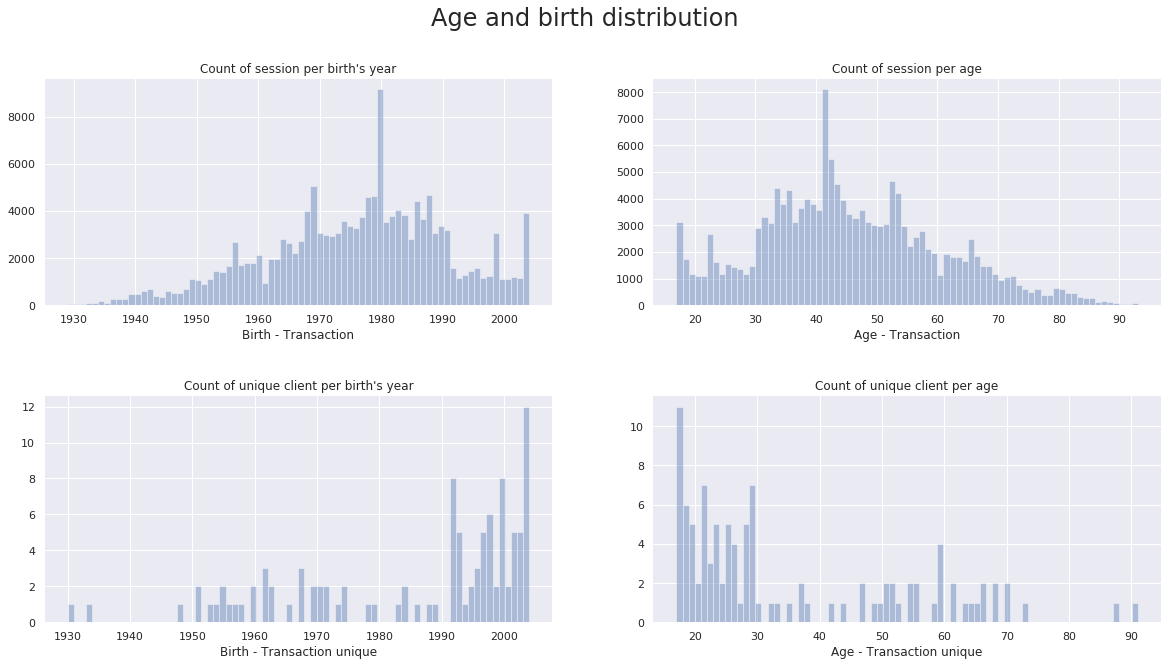

In [5]:
df_trans_drop_session = df_transactions.drop_duplicates('session_id')
df_trans_drop_client_unique = df_trans_drop_session[df_trans_drop_session['nombre_achat_client']  == 1]

fig, axes = plt.subplots(2, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session['birth'], axlabel='Birth - Transaction', kde=False, bins=76, ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_session['age'], axlabel='Age - Transaction', kde=False, bins=76, ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique['birth'], axlabel='Birth - Transaction unique', kde=False, bins=76, ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique['age'], axlabel='Age - Transaction unique', kde=False, bins=76, ax=axes[1, 1]))

ax1.title.set_text('Count of session per birth\'s year')
ax2.title.set_text('Count of session per age')
ax3.title.set_text('Count of unique client per birth\'s year')
ax4.title.set_text('Count of unique client per age')

fig.suptitle("Age and birth distribution", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)
plt.savefig('pictures/age_distribution.png')

plt.show()

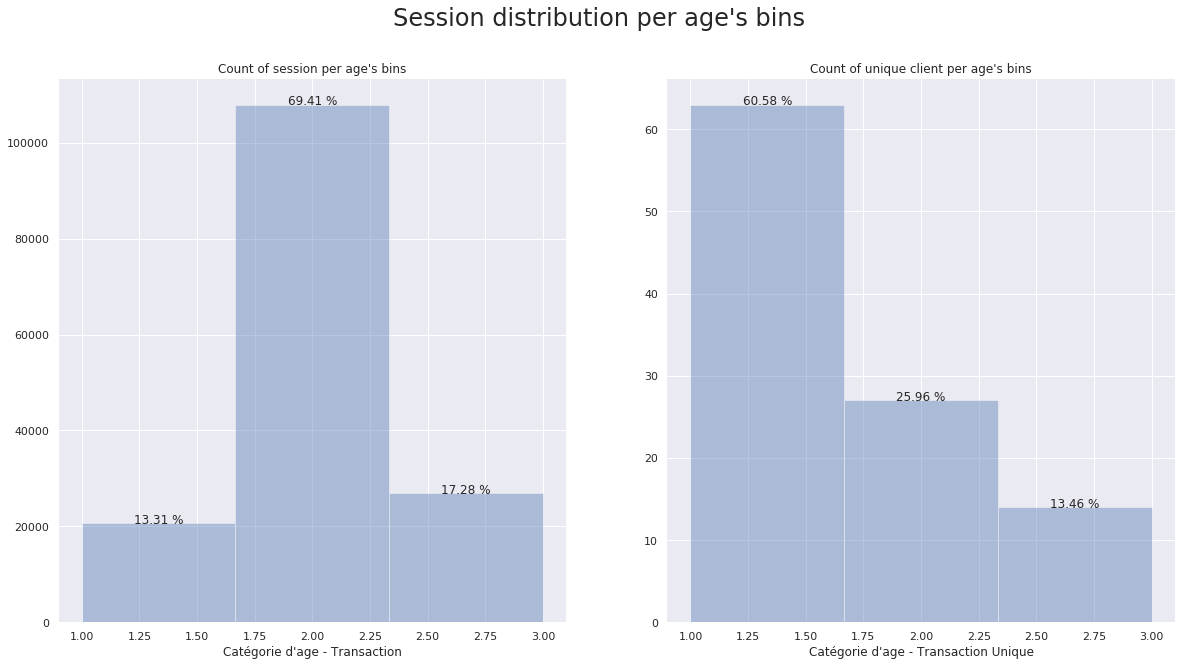

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session['cat_age'], axlabel='Catégorie d\'age - Transaction', kde=False, bins=3, ax=axes[0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique['cat_age'], axlabel='Catégorie d\'age - Transaction Unique', kde=False, bins=3, ax=axes[1]))

ax1.title.set_text('Count of session per age\'s bins')
ax2.title.set_text('Count of unique client per age\'s bins')

total = float(len(df_trans_drop_session))

ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique))
    
ax2 = OCR.plt_pourcentage(ax2, total)

fig.suptitle("Session distribution per age's bins", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.savefig('pictures/cat_age.png')

Nous remarquons deux choses, premièrement, il a un nombre très important d'achat pour l'age de 41 ans (1980), qui n'existait pas dans la table *customers*. Deuxièmenent, nous remarquons toujours la présence d'un pic pour les personnes nées en 2004. 

Ce pic peut être le signe d'un très bon client. Nous allons vérifier cela.

Nous remarquons, que le nombre de sessions uniques est très important 

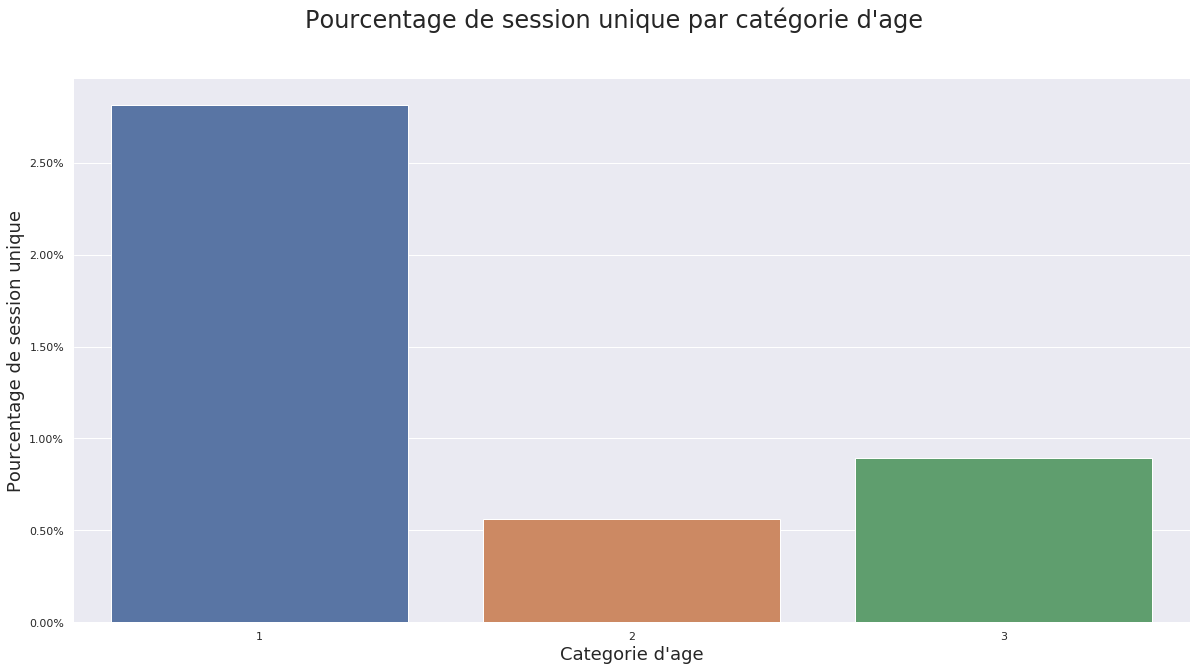

In [7]:
df = df_trans_drop_client_unique.groupby('cat_age')['client_id'].count() / df_transactions.drop_duplicates('client_id').groupby('cat_age')['client_id'].count()

fig, axes = plt.subplots(1, 1, figsize = (20, 10))
ax1 = sns.barplot(x=df.index, y=df.values) 

plt.ylabel("Pourcentage de session unique",fontsize = _FONTSIZE_)
plt.xlabel("Categorie d'age",fontsize = _FONTSIZE_)

axes.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig.suptitle("Pourcentage de session unique par catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.despine(left=True, bottom=True)

Nous voyons que les clients de moins de 30 ans sont ceux qui reviennent moins sur le site, mais dans des proportions très faible.

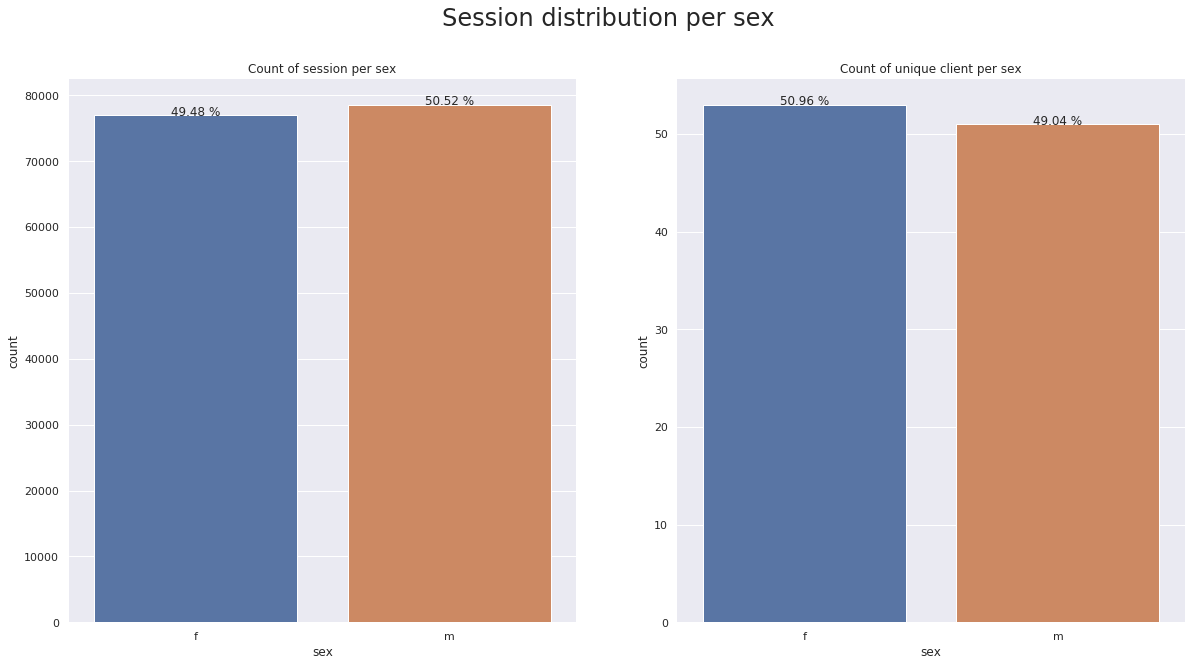

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = sns.countplot(df_trans_drop_session['sex'], ax=axes[0])
ax2 = sns.countplot(df_trans_drop_client_unique['sex'], ax=axes[1])

ax1.title.set_text('Count of session per sex')
ax2.title.set_text('Count of unique client per sex')

fig.suptitle("Session distribution per sex", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)

total = float(len(df_trans_drop_session))
   
ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique))
    
ax2 = OCR.plt_pourcentage(ax2, total)

Nous voyons qu'il y a autant d'homme que de femme qui achete sur le site.

In [9]:
df_transactions[['client_id', 'birth', 'sex', 'nombre_livre_client', 'montant_total', 'norm_prix/livre', 'bookstore']].drop_duplicates(['client_id']).nlargest(10, 'nombre_livre_client')

,client_id,birth,sex,nombre_livre_client,montant_total,norm_prix/livre,bookstore
3,c_1609,1980,m,11641,148351.06,12.743842,1
33,c_6714,1968,f,4116,68427.43,16.624740,1
37,c_3454,1969,m,3095,52016.33,16.806569,1
527,c_4958,1999,m,2433,135919.10,55.864817,1
1098,c_8026,1978,m,183,2424.50,13.248634,1
2273,c_7421,1978,m,178,2406.17,13.517809,1
3095,c_5922,1977,m,177,2216.32,12.521582,0
3821,c_3263,1985,f,177,2346.34,13.256158,1
41,c_2595,1974,m,176,2191.58,12.452159,1
2301,c_760,1980,m,176,2311.71,13.134716,1


Nous voyons qu'il existe de très bons clients, et cela explique les grandes valeurs obtenues 41 et 42 ans avec le client c_1609, 52 et 53 ans avec les clients c_6714 et c_3454 et 22 ans avec le client c_4958.


De plus, ces 4 clients ont les plus hauts montants de livres achetés. En faisant les tests de corrélation, il serait utile d'écarter ces clients. 


Nous remarquons également que le client c_4958, avec un volume moindre, atteint un montant total assez élevé. Il a un montant par livre très supérieur aux autres.


De plus, le 4 meilleurs clients ont tous achetés au moins un livre plus de 2 fois, ce qui les place dans la catégorie des bibliothécaires


Ainsi, nous allons également, vérifier l'impact de 4 clients sur les données.

In [10]:
f"Le Top 4 Client représente {df_transactions.drop_duplicates('client_id').sort_values(by='montant_total_rang').head(4).sum()['nombre_livre_client'] / df_transactions.drop_duplicates('client_id')['nombre_livre_client'].sum()*100:0.2f} % des transactions"

'Le Top 4 Client représente 6.86 % des transactions'

In [11]:
f"Le Top 4 Client représente {df_transactions.drop_duplicates('client_id').sort_values(by='montant_total_rang').head(4).sum()['montant_total'] / df_transactions.drop_duplicates('client_id')['montant_total'].sum()*100:0.2f} % du montant des transactions"

'Le Top 4 Client représente 7.49 % du montant des transactions'

Nous allons visualiser le rapport *norm_prix/livre* pour vérifier le comportement des acheteur en fonction de l'age et la *categ*

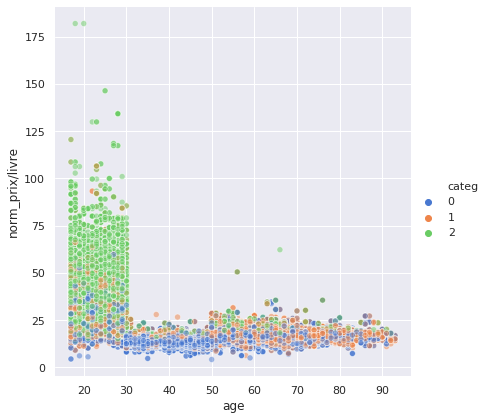

In [12]:
sns.relplot(x="age", y="norm_prix/livre", hue="categ", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions)

sns.despine(left=True, bottom=True)

Nous constatons que la categorie d'age des moins de 30 ans achète de préférences des livres de *categ* 2, qui sont généralement plus chers.

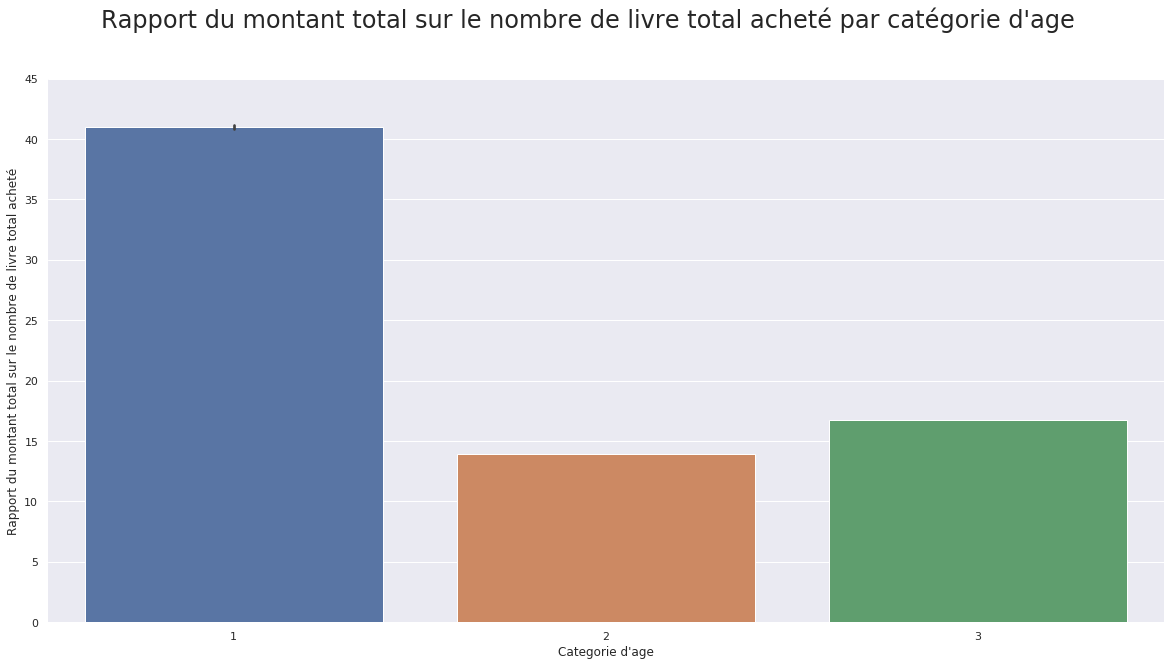

In [13]:
fig, axes = plt.subplots(figsize = (20, 10))
sns.barplot(x="cat_age", y="norm_prix/livre", data=df_transactions)

axes.set(ylim=(0, 45), ylabel="Rapport du montant total sur le nombre de livre total acheté",
       xlabel="Categorie d'age")

fig.suptitle("Rapport du montant total sur le nombre de livre total acheté par catégorie d'age", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)

Nous remarquons que la catégorie des moins de 30 ans à un rapport montant / livre acheté plus de 2 fois plus important que les autres catégorie d'age

In [14]:
df_transactions[(df_transactions['categ'] == 2)]['cat_age'].value_counts(normalize=True)

1    0.907820
2    0.072186
3    0.019994
Name: cat_age, dtype: float64

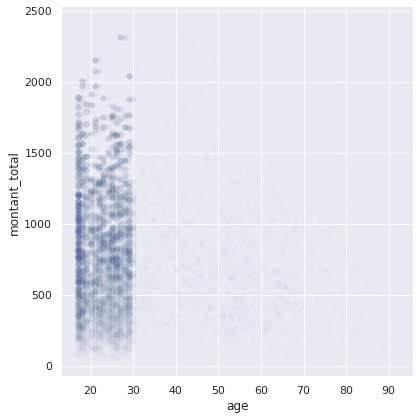

In [15]:
sns.relplot(x="age", y="montant_total", alpha=.01, palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['categ'] == 2)])

sns.despine(left=True, bottom=True)

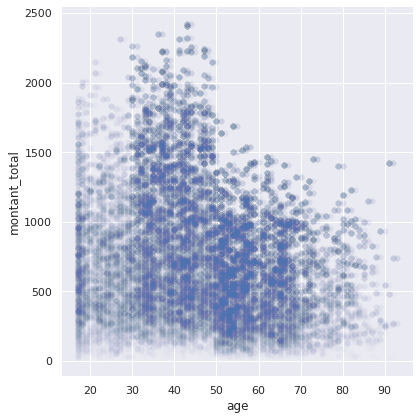

In [16]:
sns.relplot(x="age", y="montant_total", alpha=.01, palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['categ'] == 1)])

sns.despine(left=True, bottom=True)

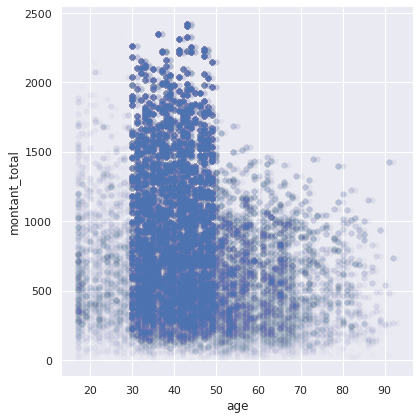

In [17]:
sns.relplot(x="age", y="montant_total", alpha=.01, palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['categ'] == 0)])

sns.despine(left=True, bottom=True)

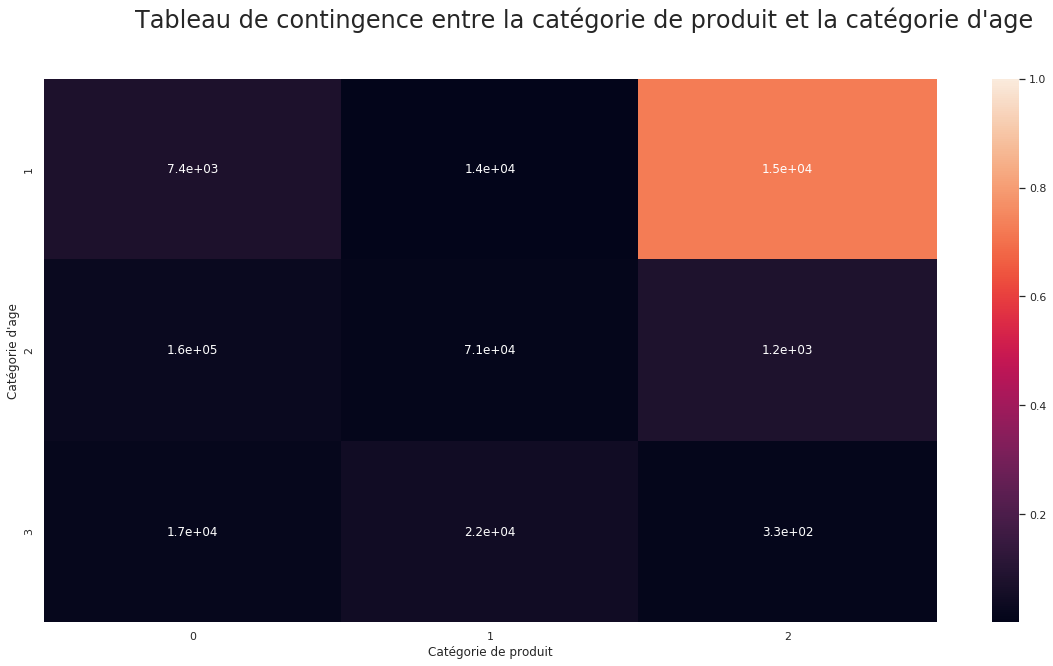

In [18]:
fig, axes = plt.subplots(figsize = (20, 10))

X = 'cat_age'
Y = 'categ'

table, c = OCR.chi_2(X,Y,df_transactions)

fig.suptitle("Tableau de contingence entre la catégorie de produit et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], vmax=1)
plt.xlabel("Catégorie de produit")
plt.ylabel("Catégorie d'age")
plt.show()

Nous montrons qu'il existe une corrélation positive entre la catégorie d'age des moins de 30 ans et la catégorie de livre de *categ* 2

In [19]:
X = "categ" # qualitative
Y = "age" # quantitative

OCR.eta_squared(df_transactions[X],df_transactions[Y])

0.11953586879278608

Sans catégorisation des ages, nous ne pouvons pas dégager une corrélation entre l'age et la catégorie de livre achetée

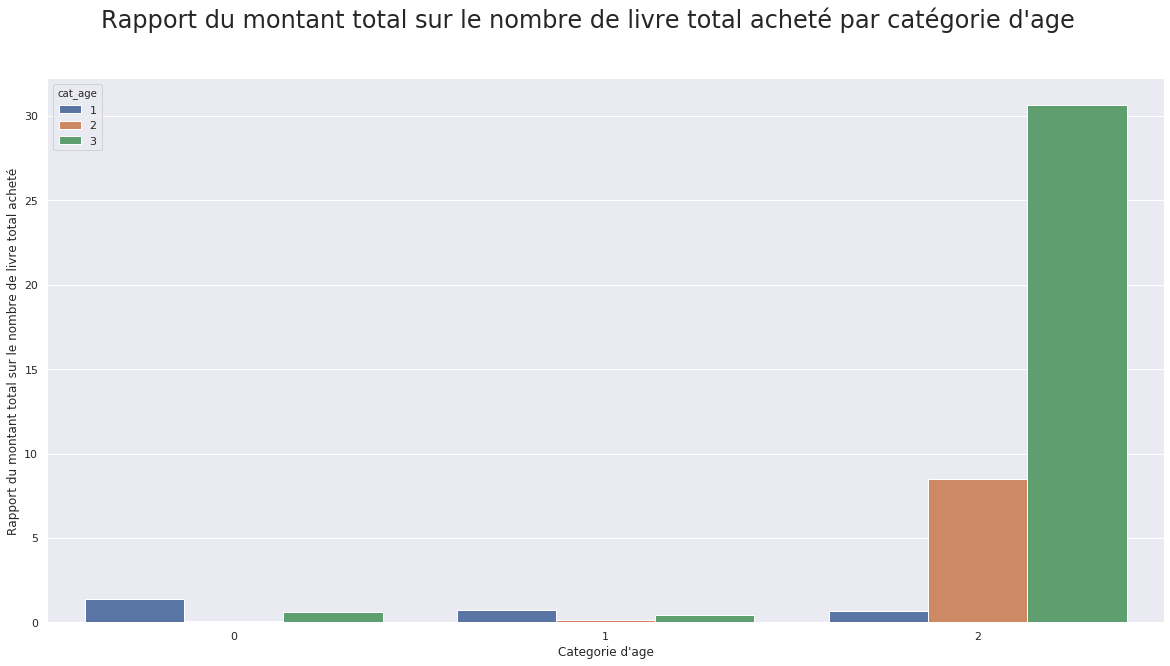

In [20]:
fig, axes = plt.subplots(figsize = (20, 10))
sns.barplot(x="categ", y="norm_categ_cat_age", hue='cat_age', data=df_transactions)

axes.set(ylabel="Rapport du montant total sur le nombre de livre total acheté",
       xlabel="Categorie d'age")

fig.suptitle("Rapport du montant total sur le nombre de livre total acheté par catégorie d'age", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)

#### DataFrame sans le top 4 clients

Nous créons un nouveau dataFrame sans le top 4 clients

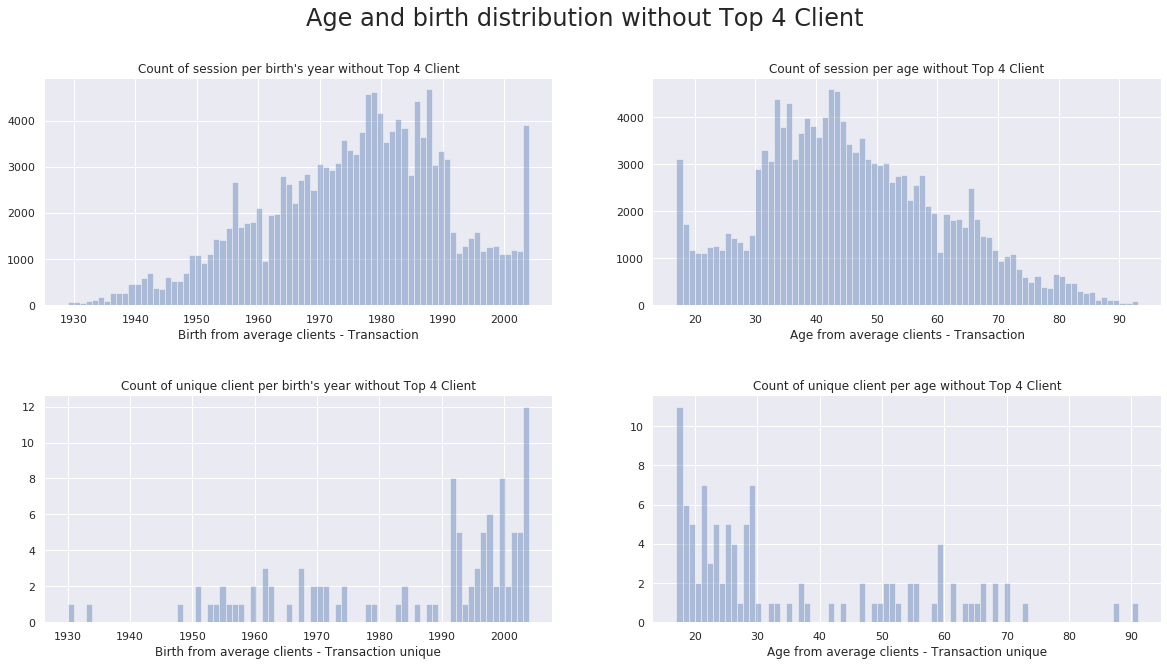

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['birth'], axlabel='Birth from average clients - Transaction', kde=False, bins=76, ax=axes[0, 0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['age'], axlabel='Age from average clients - Transaction', kde=False, bins=76, ax=axes[0, 1]))
ax3 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['birth'], axlabel='Birth from average clients - Transaction unique', kde=False, bins=76, ax=axes[1, 0]))
ax4 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['age'], axlabel='Age from average clients - Transaction unique', kde=False, bins=76, ax=axes[1, 1]))

ax1.title.set_text('Count of session per birth\'s year without Top 4 Client')
ax2.title.set_text('Count of session per age without Top 4 Client')
ax3.title.set_text('Count of unique client per birth\'s year without Top 4 Client')
ax4.title.set_text('Count of unique client per age without Top 4 Client')

fig.suptitle("Age and birth distribution without Top 4 Client", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.subplots_adjust(hspace = 0.4)

plt.show()

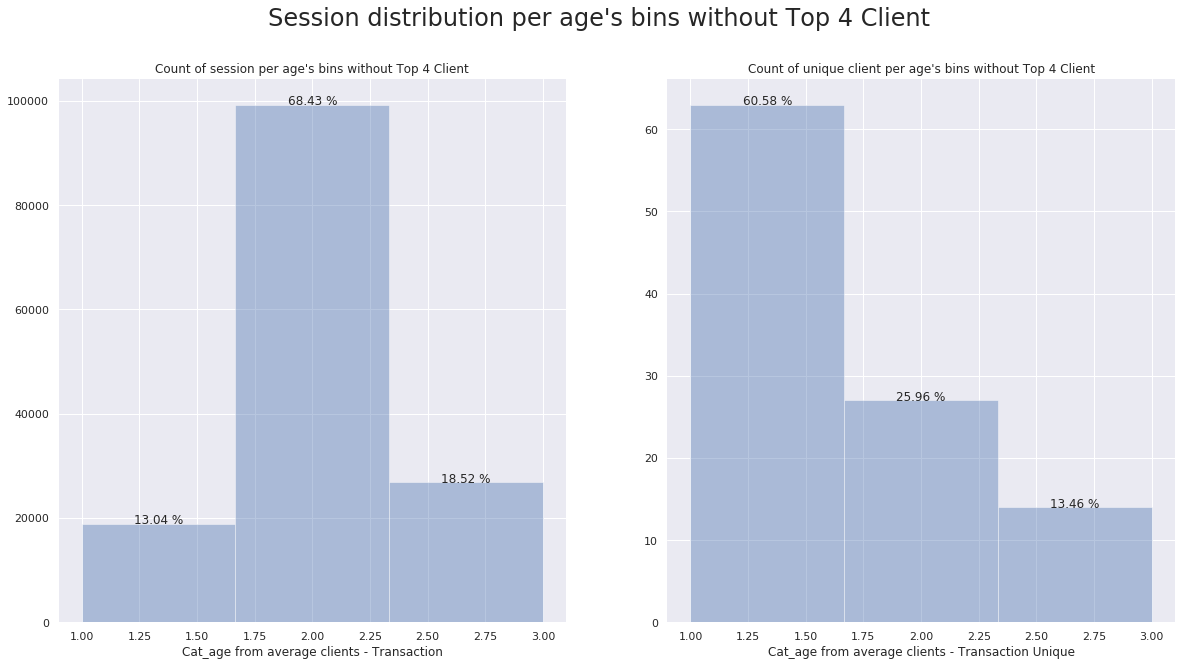

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = fig.add_subplot(sns.distplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['cat_age'], axlabel='Cat_age from average clients - Transaction', kde=False, bins=3, ax=axes[0]))
ax2 = fig.add_subplot(sns.distplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['cat_age'], axlabel='Cat_age from average clients - Transaction Unique', kde=False, bins=3, ax=axes[1]))

ax1.title.set_text('Count of session per age\'s bins without Top 4 Client')
ax2.title.set_text('Count of unique client per age\'s bins without Top 4 Client')

total = float(len(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]))

ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4])) 
    
ax2 = OCR.plt_pourcentage(ax2, total)

fig.suptitle("Session distribution per age's bins without Top 4 Client", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)

Nous voyons ici, que la catégorie d'age des 30/49 ans est la plus représentative, avec ou sans le Top 4 Client.

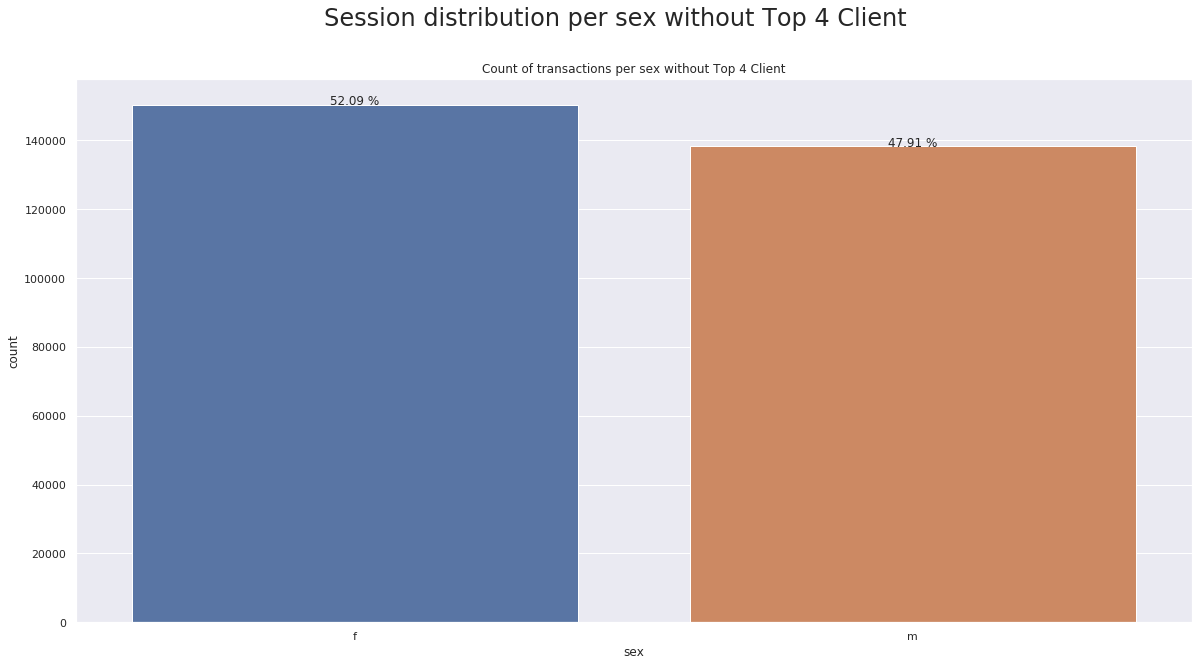

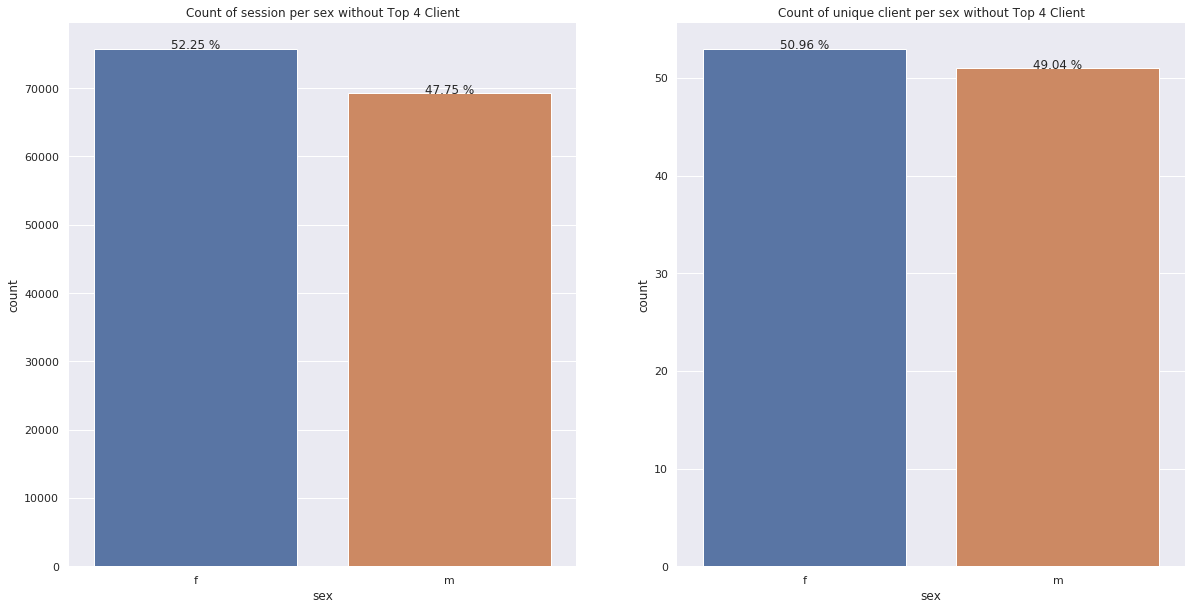

In [23]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
fig.suptitle("Session distribution per sex without Top 4 Client", fontsize= _FONTSIZETITLE_)

ax1 = sns.countplot(df_transactions[df_transactions['montant_total_rang'] > 4]['sex'])
ax1.title.set_text('Count of transactions per sex without Top 4 Client')

total = float(len(df_transactions[df_transactions['montant_total_rang'] > 4]))
ax1 = OCR.plt_pourcentage(ax1, total)

fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = sns.countplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['sex'], ax=axes[0])
ax2 = sns.countplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['sex'], ax=axes[1])

ax1.title.set_text('Count of session per sex without Top 4 Client')
ax2.title.set_text('Count of unique client per sex without Top 4 Client')

sns.despine(left=True, bottom=True)

total = float(len(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]))
ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]))
ax2 = OCR.plt_pourcentage(ax2, total)

L'écart est le sensiblement le même sans le Top 4 Client

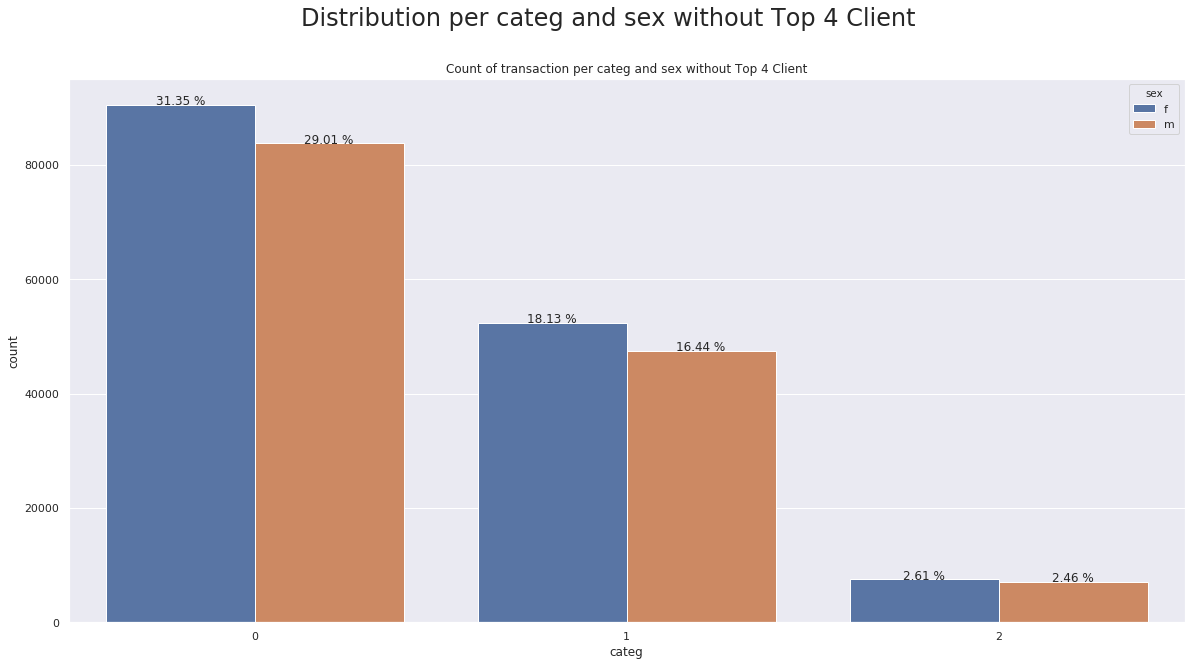

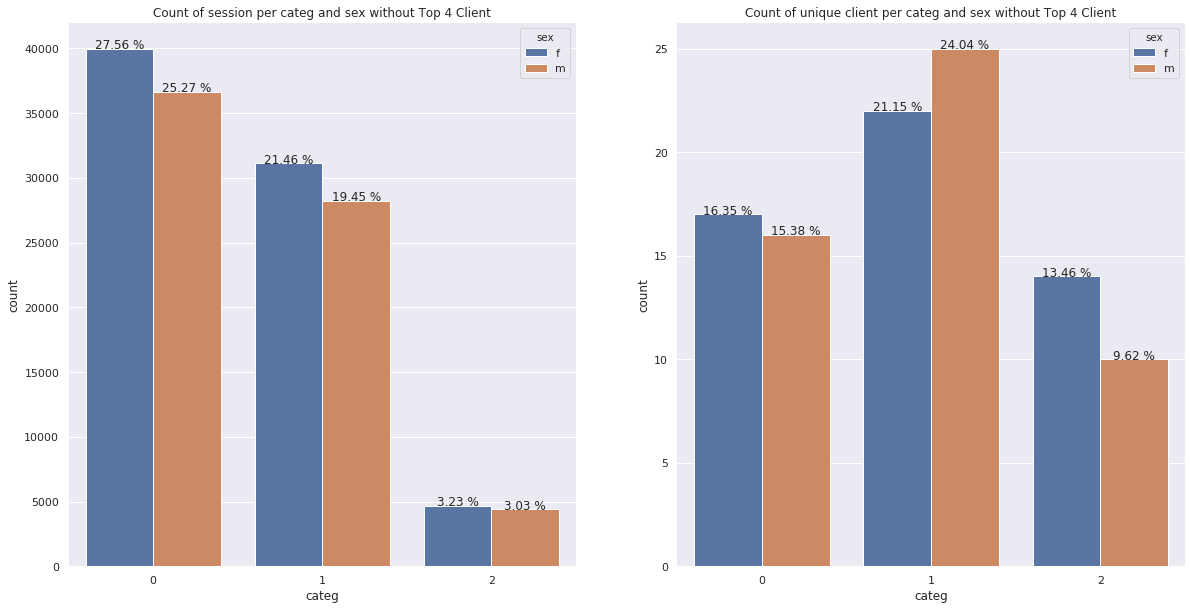

In [24]:
fig, axes = plt.subplots(figsize = (20, 10))

ax1 = sns.countplot(df_transactions[df_transactions['montant_total_rang'] > 4]['categ'], hue=df_transactions[df_transactions['montant_total_rang'] > 4]['sex'])
ax1.title.set_text('Count of transaction per categ and sex without Top 4 Client')

fig.suptitle("Distribution per categ and sex without Top 4 Client", fontsize= _FONTSIZETITLE_)

total = float(len(df_transactions[df_transactions['montant_total_rang'] > 4]))
ax1 = OCR.plt_pourcentage(ax1, total)

fig, axes = plt.subplots(1, 2, figsize = (20, 10))

ax1 = sns.countplot(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['categ'], hue=df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]['sex'], ax=axes[0])
ax2 = sns.countplot(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['categ'], hue=df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]['sex'], ax=axes[1])

ax1.title.set_text('Count of session per categ and sex without Top 4 Client')
ax2.title.set_text('Count of unique client per categ and sex without Top 4 Client')

sns.despine(left=True, bottom=True)

total = float(len(df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4]))

ax1 = OCR.plt_pourcentage(ax1, total)

total = float(len(df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4]))
    
ax2 = OCR.plt_pourcentage(ax2, total)

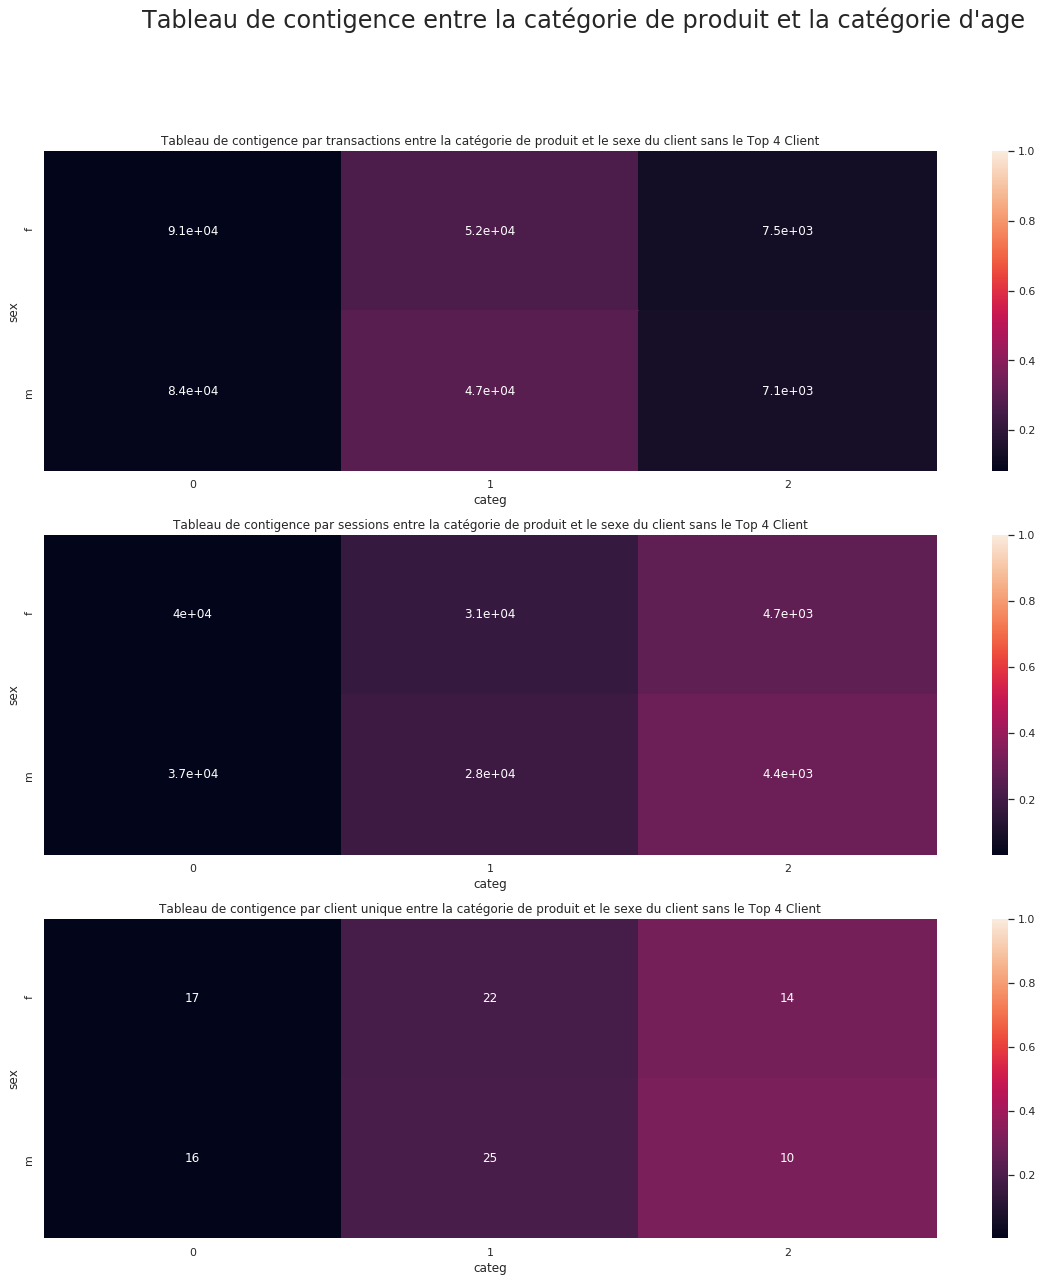

In [25]:
fig, axes = plt.subplots(3, 1, figsize = (20, 20))

X = 'sex'
Y = 'categ'

fig.suptitle("Tableau de contigence entre la catégorie de produit et la catégorie d'age", fontsize= _FONTSIZETITLE_)

table, c = OCR.chi_2(X, Y, df_transactions[df_transactions['montant_total_rang'] > 4])
ax1 = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], vmax=1, ax=axes[0])
ax1.title.set_text('Tableau de contigence par transactions entre la catégorie de produit et le sexe du client sans le Top 4 Client')

table, c = OCR.chi_2(X, Y, df_trans_drop_session[df_trans_drop_session['montant_total_rang'] > 4])
ax2 = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], vmax=1, ax=axes[1])
ax2.title.set_text('Tableau de contigence par sessions entre la catégorie de produit et le sexe du client sans le Top 4 Client')

table, c = OCR.chi_2(X, Y, df_trans_drop_client_unique[df_trans_drop_client_unique['montant_total_rang'] > 4])
ax3 = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], vmax=1, ax=axes[2])
ax3.title.set_text('Tableau de contigence par client unique entre la catégorie de produit et le sexe du client sans le Top 4 Client')

plt.show()

Nous voyons qu'il n'existe pas de correlation entre le sexe du client et la catégorie de produit.

### B. Colonne *price*, *cat_price*, *categ* , *montant_total* et *bookstore*

#### DataFrame avec tous les clients

Nous allons étudier la colonne *price* et *categ*. Nous allons déterminer si il existe une corrélation entre les deux. Les prix s'échalonne de 0.62 euros à 300 euros. Il existe 3 catégories dans *categ*

D'abord, nous allons regarder la colonne *price*, et la comparer avec la même colonne du fichier *products*

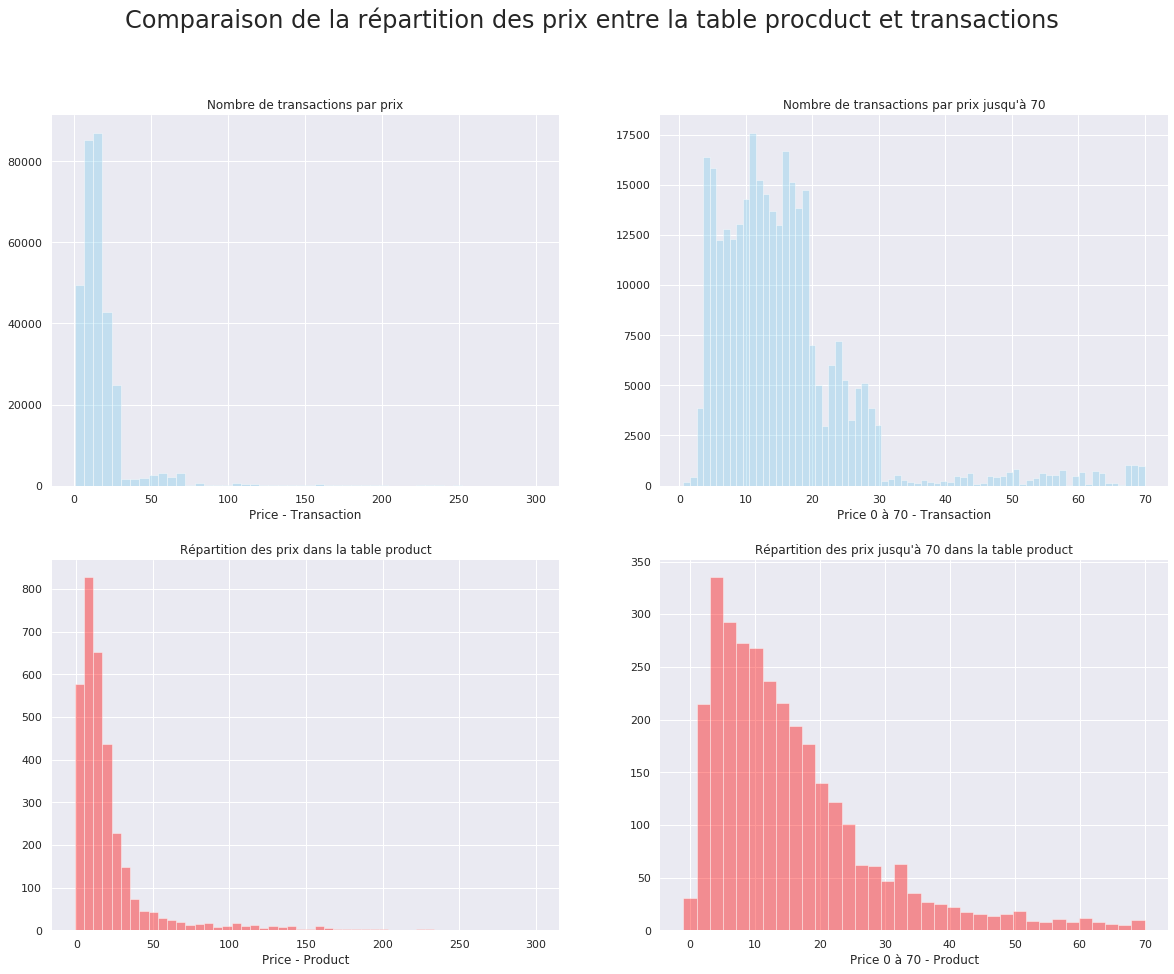

In [26]:
fig, axes = plt.subplots(2, 2, figsize = (20, 15))

ax1 = sns.distplot(df_transactions['price'], axlabel='Price - Transaction', color="skyblue", kde=False, bins=50, ax=axes[0, 0])
ax2 = sns.distplot(df_transactions[df_transactions['price'] < 70]['price'], axlabel='Price 0 à 70 - Transaction', color="skyblue", kde=False, bins=70, ax=axes[0, 1])
ax3 = sns.distplot(products['price'], axlabel='Price - Product', color="red", kde=False, ax=axes[1, 0])
ax4 = sns.distplot(products[products['price'] < 70]['price'], axlabel='Price 0 à 70 - Product', color="red", kde=False, bins=35, ax=axes[1, 1])

ax1.title.set_text('Nombre de transactions par prix')
ax2.title.set_text('Nombre de transactions par prix jusqu\'à 70')
ax3.title.set_text('Répartition des prix dans la table product')
ax4.title.set_text('Répartition des prix jusqu\'à 70 dans la table product')

fig.suptitle("Comparaison de la répartition des prix entre la table procduct et transactions", fontsize= _FONTSIZETITLE_)
sns.despine(left=True, bottom=True)
plt.savefig('pictures/prix_distribution.png')

Nous remarquons que la répartition des prix entre la référence produit et la commande des produits est différente. Cette différence est plus marquée sur des prix inférieurs à 70 euros. Ce sont les livres entre 10 et 12 euros qui sont les plus vendus. Ensuite, la fourchette entre 6 et 18 euros représente la majorité des ventes.

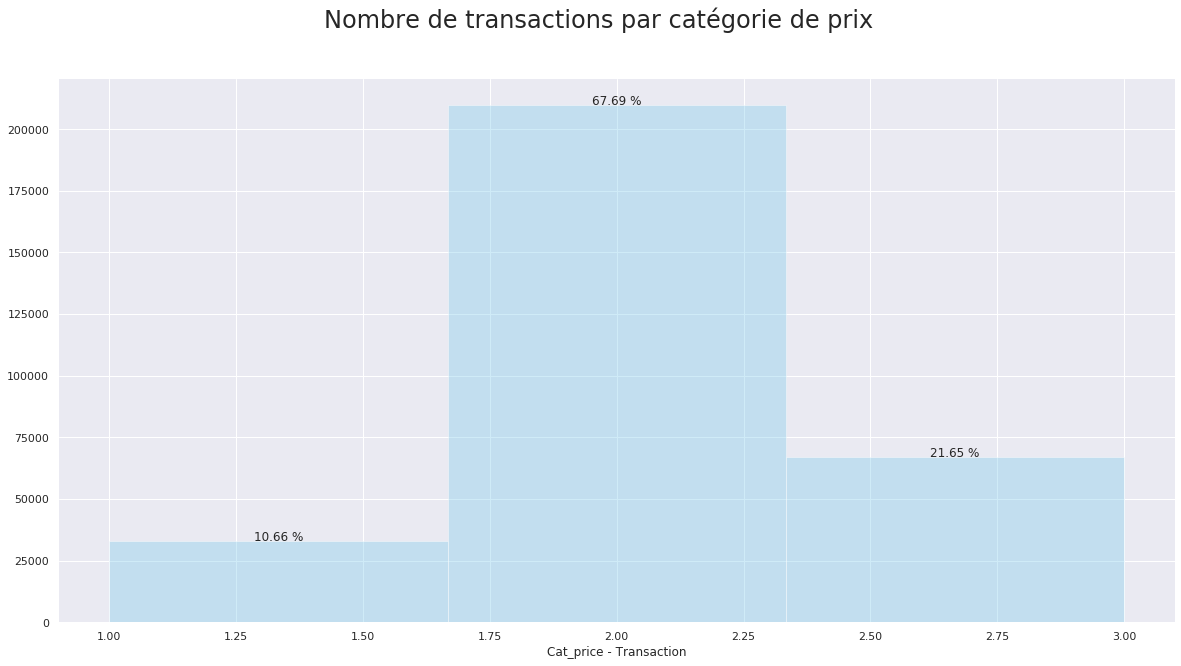

In [27]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
ax1 = sns.distplot(df_transactions['cat_price'], axlabel='Cat_price - Transaction', color="skyblue", kde=False, bins=3)

fig.suptitle('Nombre de transactions par catégorie de prix', fontsize= _FONTSIZETITLE_)

total = float(len(df_transactions))

ax1 = OCR.plt_pourcentage(ax1, total)

sns.despine(left=True, bottom=True)
plt.savefig('pictures/cat_price.png')

La colonne *cat_price* nous montre également que la catégorie de livre la plus vendue est celle dont le prix est situé entre 10 et 19.99 euros.

Nous allons regarder la colonne *categ*, et essaye de comprendre ce qu'elle représente

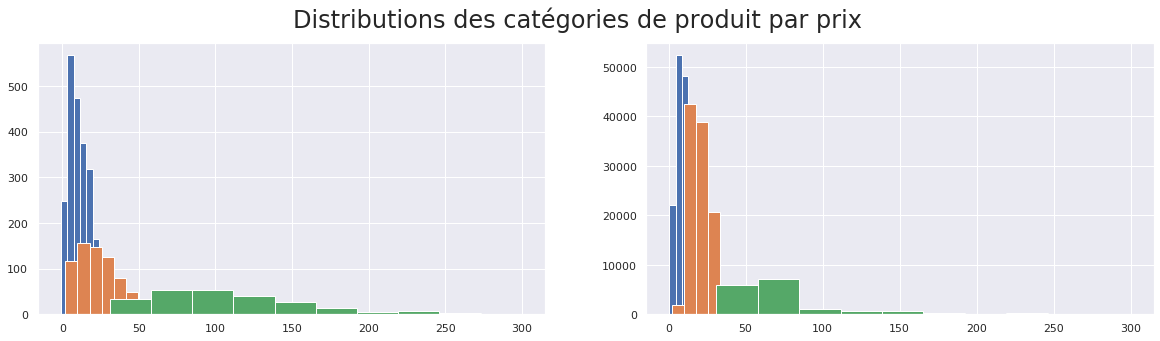

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (20, 5))

fig.suptitle('Distributions des catégories de produit par prix', fontsize= _FONTSIZETITLE_)

ax = products.groupby('categ').price.hist(ax=axes[0])
ax = df_transactions.groupby('categ').price.hist(ax=axes[1])

plt.savefig('pictures/categ.png')
plt.show()

Nous constatons que *categ* est sensible au prix mais doit représenter des types de livres différents, par exemple, la catégorie 1 représente les livres de poche, la catégorie 2, le livre grand format, et la catégorie 3 les beaux livres comme les encyclopédies. 

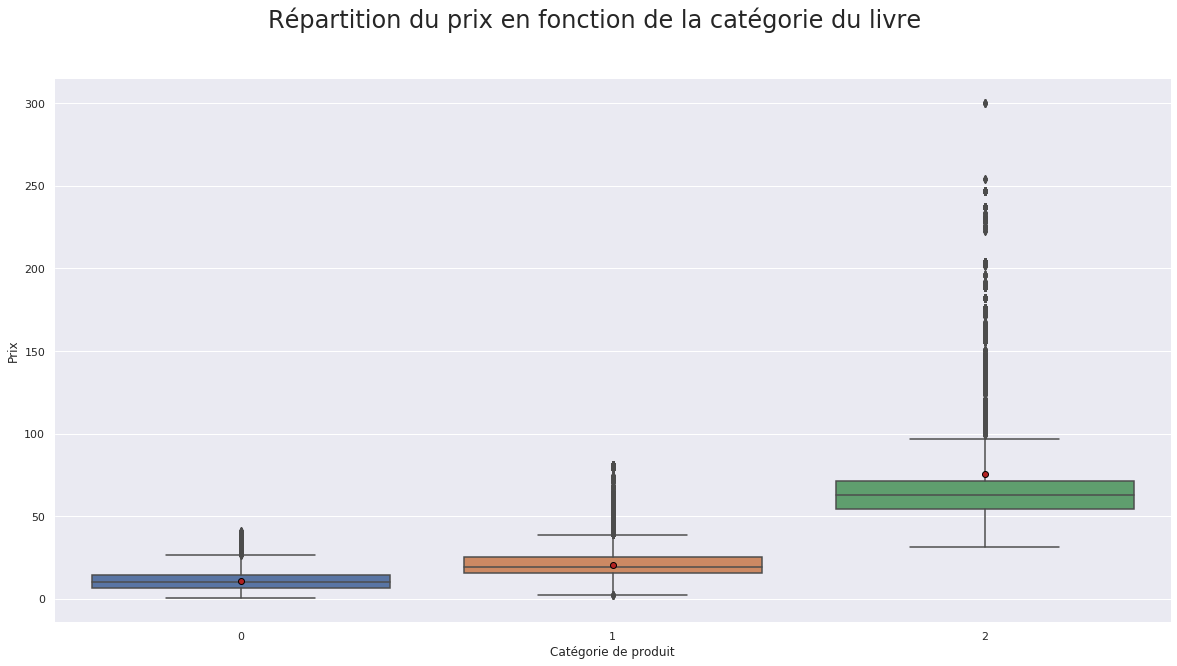

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

fig.suptitle('Répartition du prix en fonction de la catégorie du livre', fontsize= _FONTSIZETITLE_)
ax1 = sns.boxplot(x=df_transactions['categ'], y=df_transactions['price'], meanprops=meanprops, showmeans=True, data=df_transactions)

plt.xlabel("Catégorie de produit")
plt.ylabel("Prix")

sns.despine(left=True, bottom=True)
plt.savefig('pictures/categ_moustache.png')

Nous constatons que les prix de *categ* sont dans un interquartile Q1-Q3 très petit, avec des bornes peu étendue également. Pour les categ 1 et 2, les outliers sont peu étalés, tandis que sur la categ 3, les outliers sont très étalés avec des prix élevés. Il y a une échalonnage des prix qui est plus marqué pour la categ 3.

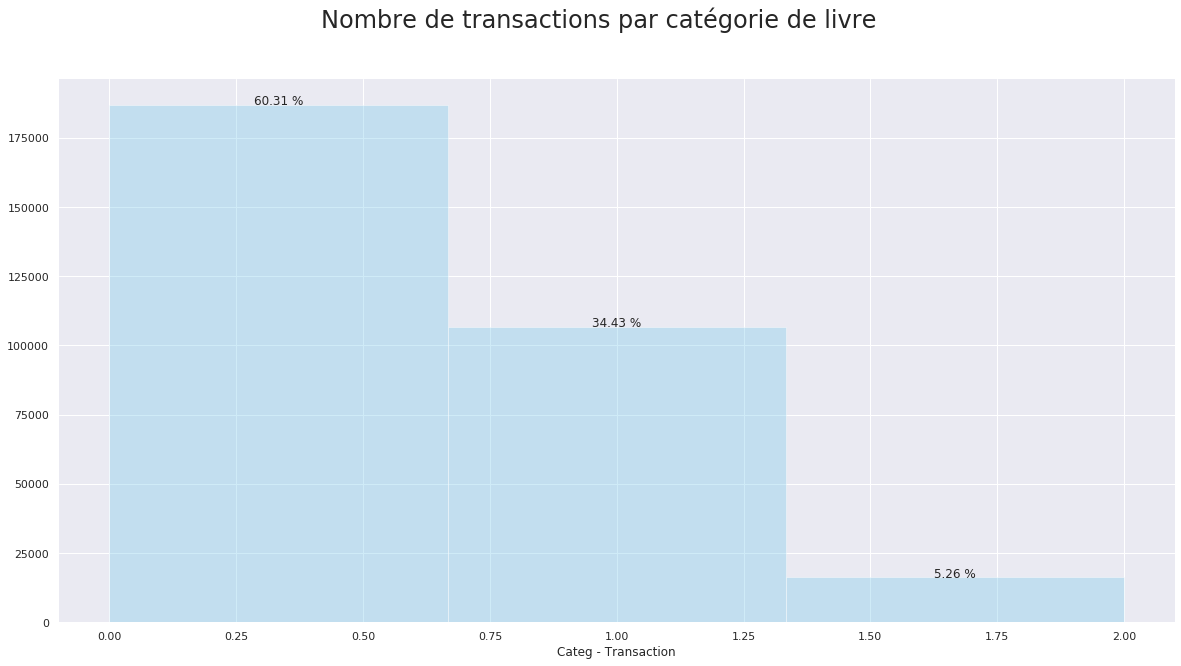

In [30]:
fig, axes = plt.subplots(1, 1, figsize = (20, 10))
ax1 = sns.distplot(df_transactions['categ'], axlabel='Categ - Transaction', color="skyblue", kde=False, bins=3)

fig.suptitle('Nombre de transactions par catégorie de livre', fontsize= _FONTSIZETITLE_)

total = float(len(df_transactions))

ax1 = OCR.plt_pourcentage(ax1, total)

sns.despine(left=True, bottom=True)
plt.savefig('pictures/categ_distribution.png')

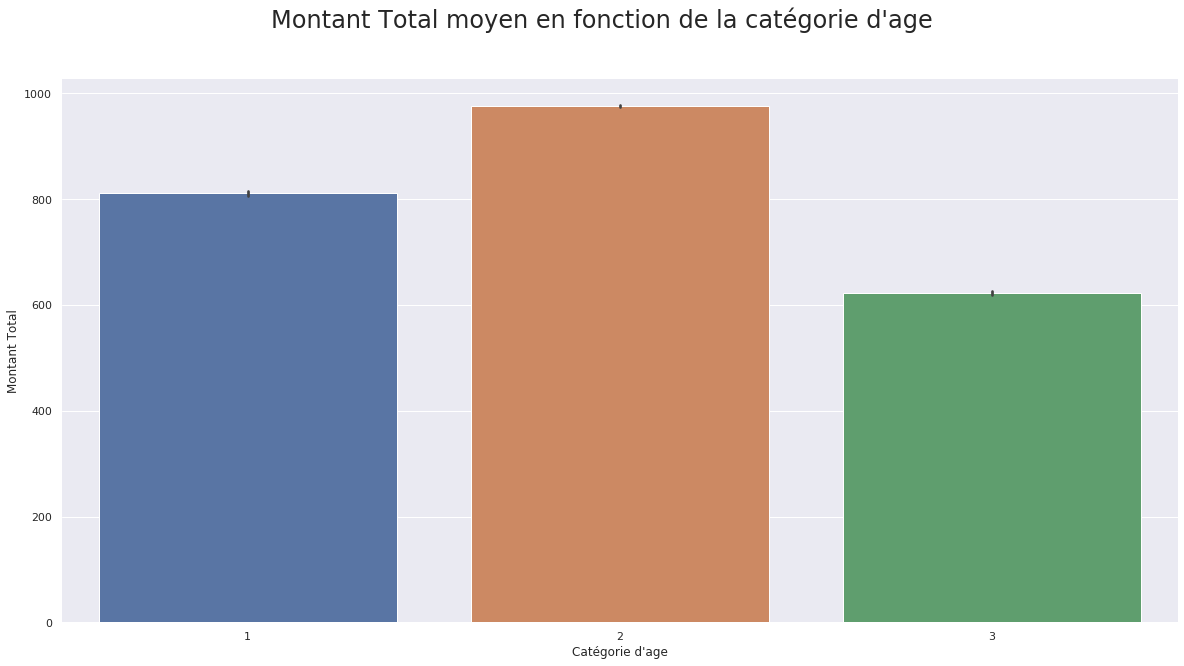

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
fig.suptitle('Montant Total moyen en fonction de la catégorie d\'age', fontsize= _FONTSIZETITLE_)

sns.barplot(x="cat_age", y="montant_total", data=df_transactions[df_transactions['montant_total_rang'] > 4])

plt.xlabel("Catégorie d'age")
plt.ylabel("Montant Total")

sns.despine(left=True, bottom=True)

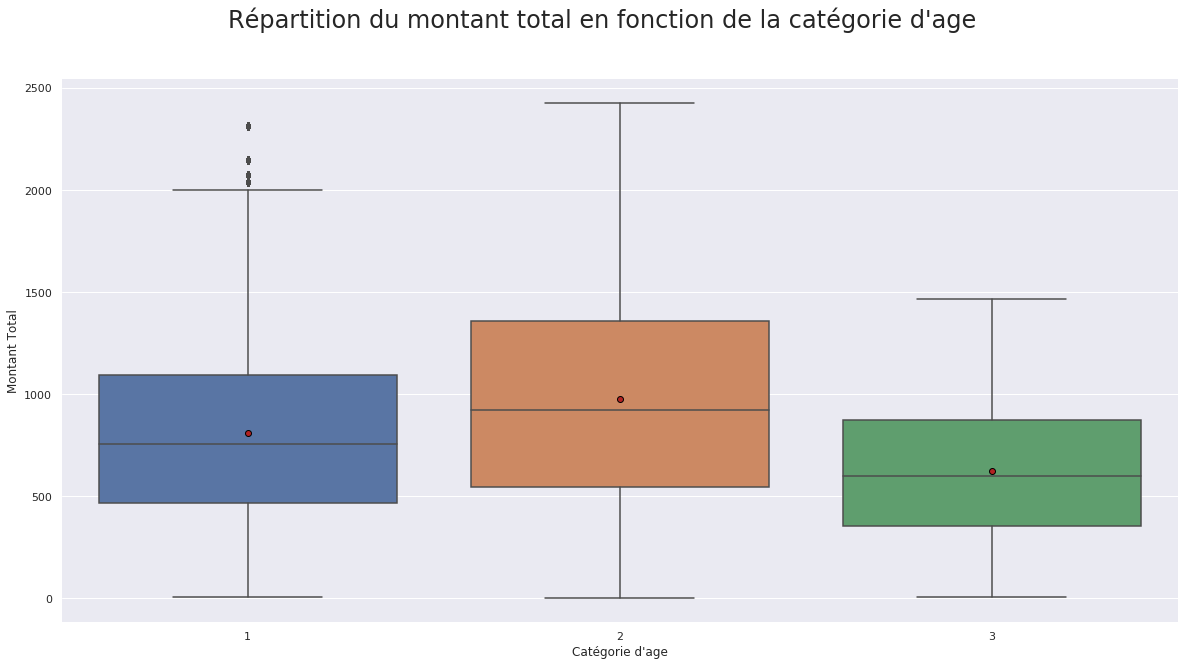

In [32]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
fig.suptitle('Répartition du montant total en fonction de la catégorie d\'age', fontsize= _FONTSIZETITLE_)

sns.boxplot(x=df_transactions[df_transactions['montant_total_rang'] > 4]['cat_age'], y=df_transactions[df_transactions['montant_total_rang'] > 4]['montant_total'], meanprops=meanprops, showmeans=True, data=df_transactions)

plt.xlabel("Catégorie d'age")
plt.ylabel("Montant Total")

sns.despine(left=True, bottom=True)

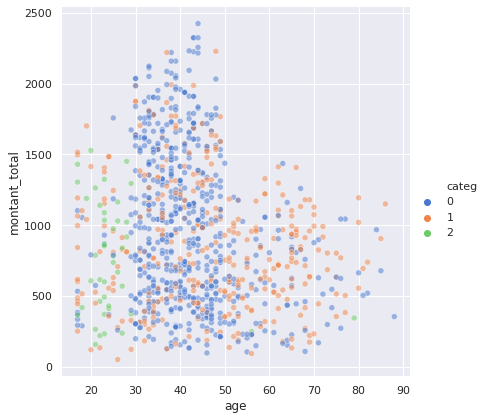

In [33]:
sns.relplot(x="age", y="montant_total", hue="categ", 
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_transactions[df_transactions['montant_total_rang'] > 4].sample(1000))

sns.despine(left=True, bottom=True)

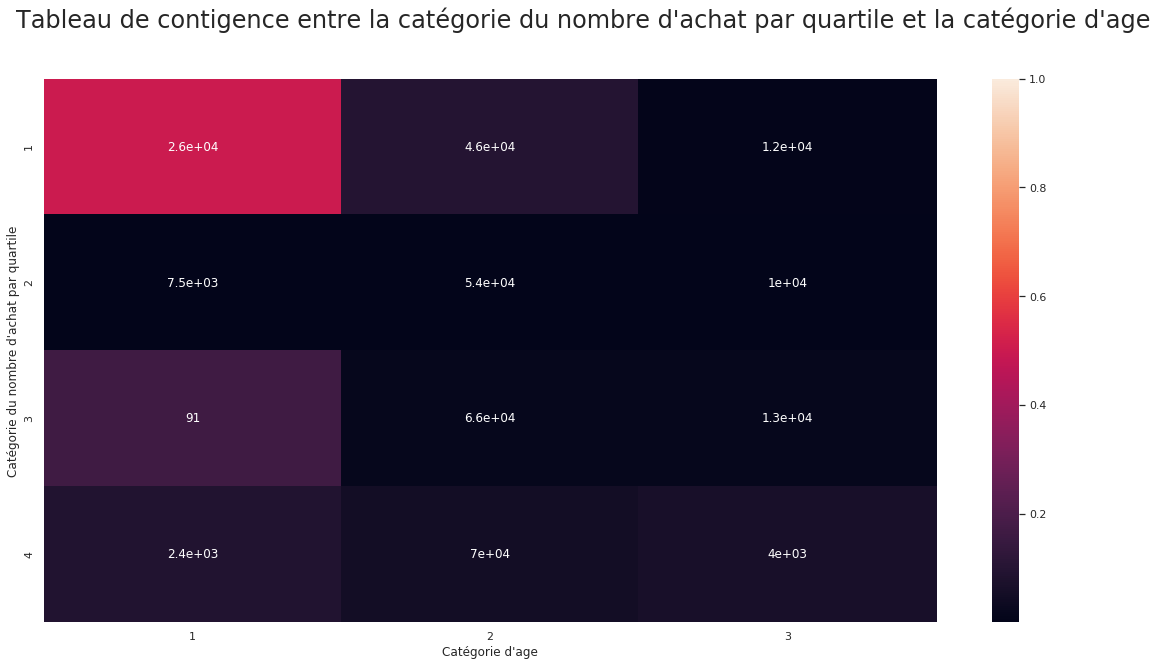

In [34]:
fig, axes = plt.subplots(figsize = (20, 10))

X = 'cat_nb_achat'
Y = 'cat_age'

table, c = OCR.chi_2(X,Y,df_transactions)

fig.suptitle("Tableau de contigence entre la catégorie du nombre d'achat par quartile et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], vmax=1)
plt.xlabel("Catégorie d'age")
plt.ylabel("Catégorie du nombre d'achat par quartile")
plt.show()

Nous constatons qu'il existe une corrélation entre la catégorie d'achat la plus faible et la catégorie d'age des moins de 30 ans. Cette catégorie d'age est la moins nombreuse présente sur le site

In [35]:
f"Elle ne représente que {df_transactions['cat_age'].value_counts(normalize=True)[1] * 100:0.2f} % des clients"

'Elle ne représente que 11.62 % des clients'

In [36]:
X = "cat_age" # qualitative
Y = "nombre_achat_client" # quantitative
    
f"Le coefficient de corrélation est de {OCR.eta_squared(df_transactions[X],df_transactions[Y]):0.3f}, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

"Le coefficient de corrélation est de 0.013, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

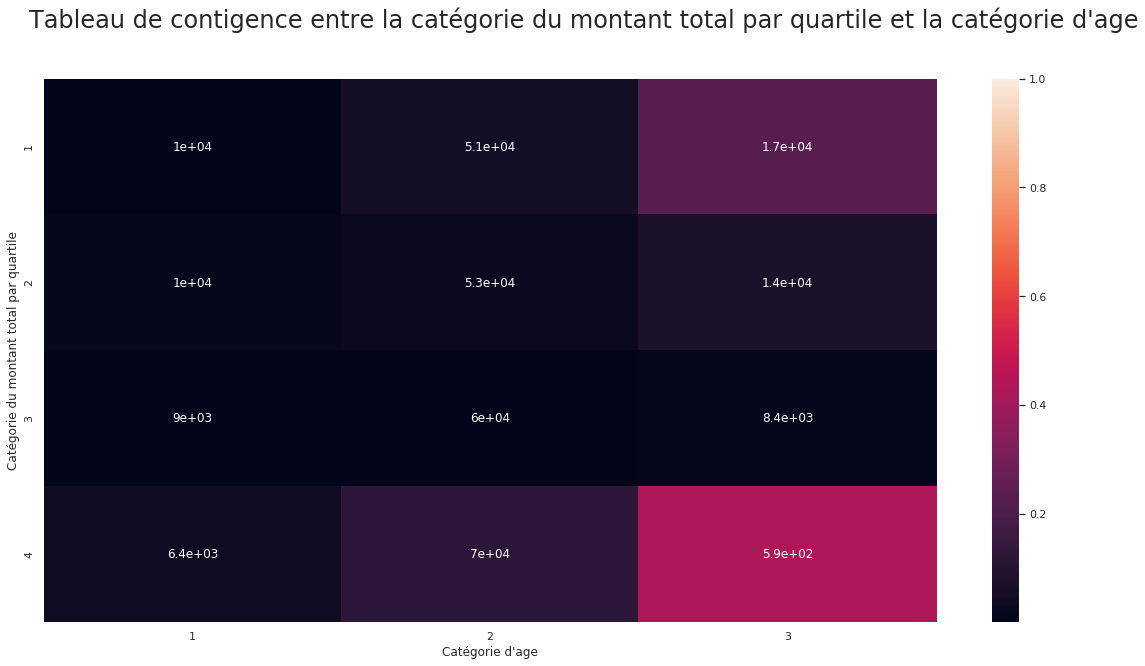

In [37]:
fig, axes = plt.subplots(figsize = (20, 10))

X = 'cat_montant_total'
Y = 'cat_age'

table, c = OCR.chi_2(X,Y,df_transactions)

fig.suptitle("Tableau de contigence entre la catégorie du montant total par quartile et la catégorie d'age", fontsize= _FONTSIZETITLE_)

sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], vmax=1)
plt.xlabel("Catégorie d'age")
plt.ylabel("Catégorie du montant total par quartile")
plt.show()

Il n'y a pas de corrélation franche entre la catégorie du montant d'achat et la catégorie d'age

In [38]:
X = "cat_age" # qualitative
Y = "montant_total" # quantitative
    
f"Le coefficient de corrélation est de {OCR.eta_squared(df_transactions[X],df_transactions[Y]):0.3f}, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

"Le coefficient de corrélation est de 0.010, proche de zéro, montre qu'il n'y a par de corrélation entre les deux"

Il n'y a pas de corrélation entre l'age et le montant total

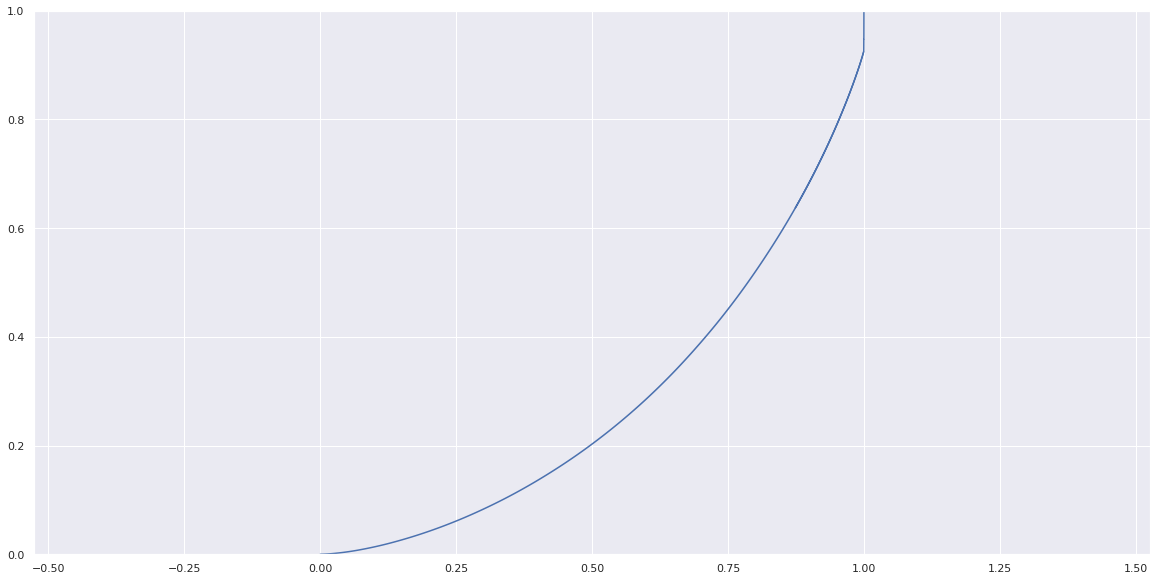

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

lorenz, n, gini = OCR.lorenz(df_transactions.drop_duplicates('client_id')['montant_total'])

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [40]:
f"l'indice de gini est de {gini:0.2f}"

"l'indice de gini est de 0.44"

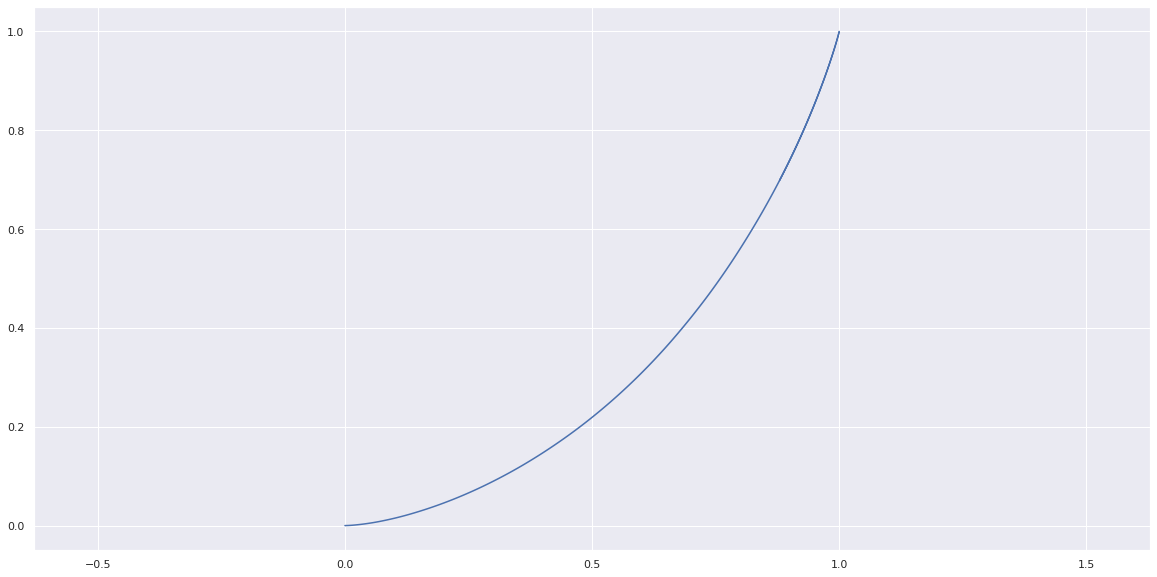

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

lorenz, n, gini = OCR.lorenz(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('client_id')['montant_total'])

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [42]:
f"l'indice de gini est de {gini:0.2f}"

"l'indice de gini est de 0.40"

#### DataFrame sans le top 4 clients

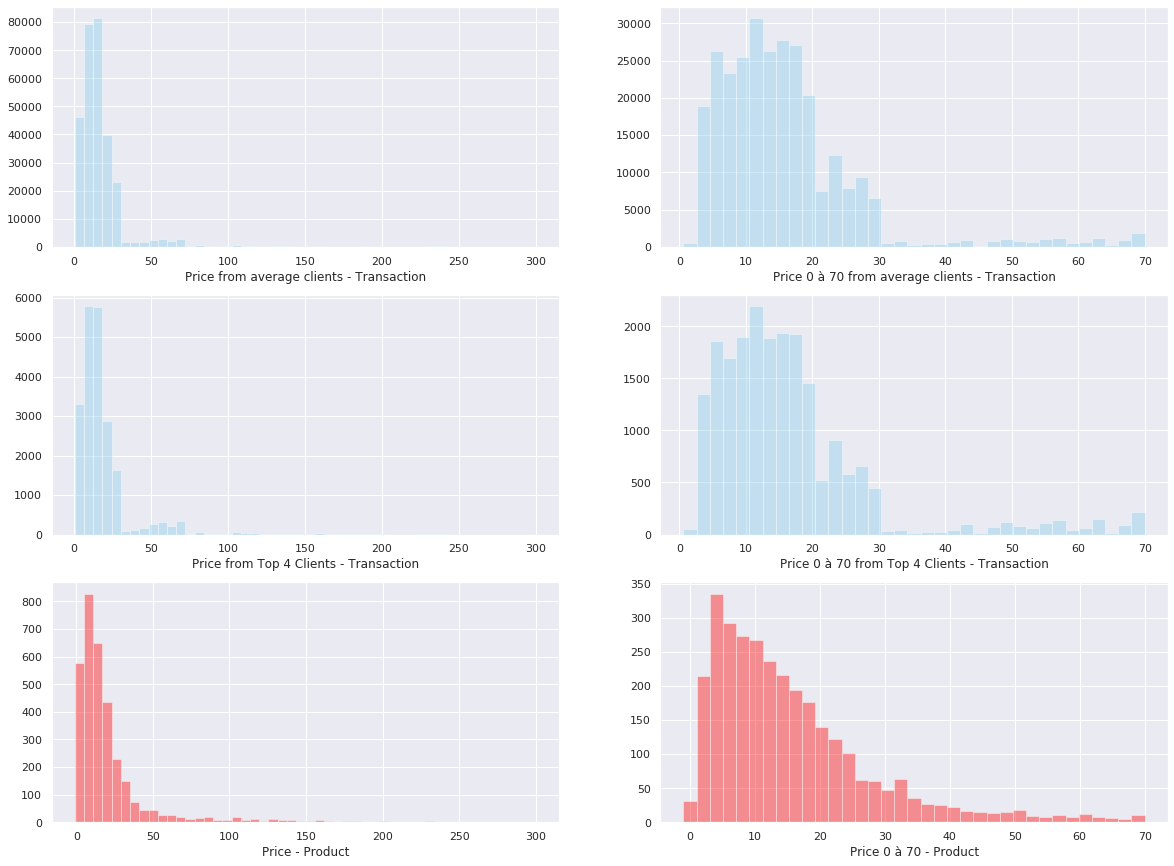

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['price'], axlabel='Price from average clients - Transaction', color="skyblue", kde=False, bins=50, ax=axes[0, 0])
sns.distplot(df_transactions[(df_transactions['price'] < 70) & (df_transactions['montant_total_rang'] > 4)]['price'], axlabel='Price 0 à 70 from average clients - Transaction', color="skyblue", kde=False, bins=35, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['price'], axlabel='Price from Top 4 Clients - Transaction', color="skyblue", kde=False, bins=50, ax=axes[1, 0])
sns.distplot(df_transactions[(df_transactions['price'] < 70) & (df_transactions['montant_total_rang'] < 5)]['price'], axlabel='Price 0 à 70 from Top 4 Clients - Transaction', color="skyblue", kde=False, bins=35, ax=axes[1, 1])
sns.distplot(products['price'], axlabel='Price - Product', color="red", kde=False, ax=axes[2, 0])
sns.distplot(products[products['price'] < 70]['price'], axlabel='Price 0 à 70 - Product', color="red", kde=False, bins=35, ax=axes[2, 1])


Nous remarquons que la différence des formes de la courbe des prix des produits achetés par le top 4 des clients ou les clients normaux n'est pas significative.

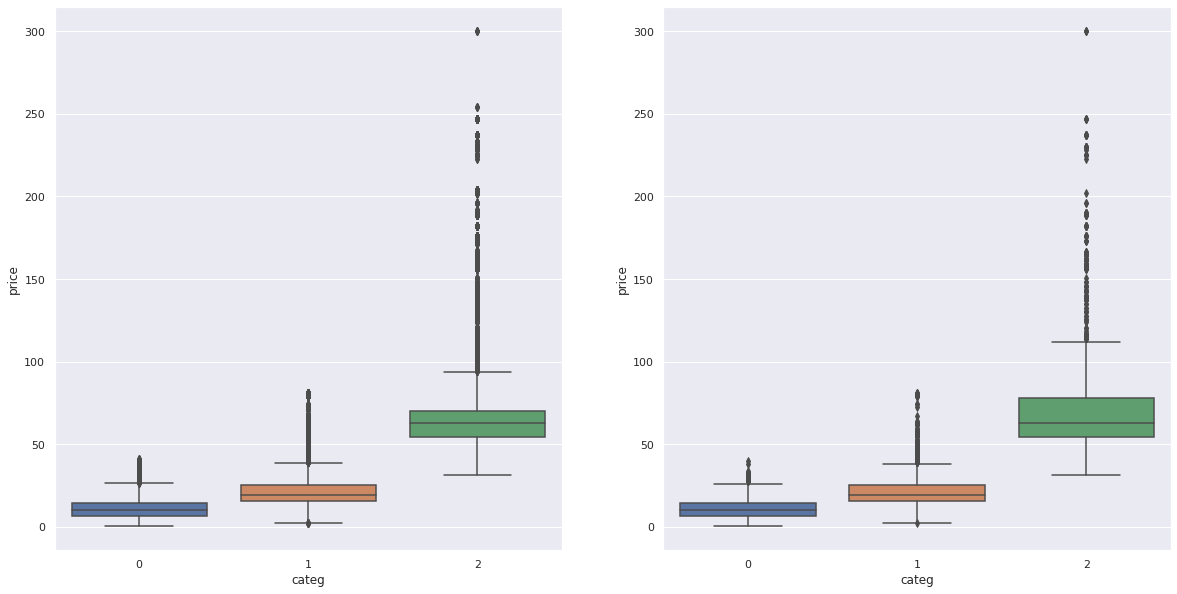

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x=df_transactions[df_transactions['montant_total_rang'] > 4]['categ'], y=df_transactions['price'],data=df_transactions, ax=axes[0])
sns.boxplot(x=df_transactions[df_transactions['montant_total_rang'] < 5]['categ'], y=df_transactions['price'],data=df_transactions, ax=axes[1])

Nous constatons que les deux graphiques sont semblables

### C. Colonne *date*, *weekday*, *daytime*, *month*, *week*, *year*

#### DataFrame avec tous les clients

Nous allons vérifier les colonnes liés aux dates

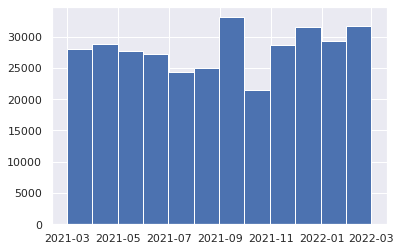

In [45]:
df_transactions_w_october['date'].hist(bins = 12)

In [46]:
df_transactions.nlargest(1, 'date').date

254695   2022-02-28 23:59:58.040472
Name: date, dtype: datetime64[ns]

In [47]:
df_transactions.nsmallest(1, 'date').date

221790   2021-03-01 00:01:07.843138
Name: date, dtype: datetime64[ns]

Nous constatons bien que les dates débutent en mars 2021 et finissent fin février 2022, soit sur 12 mois

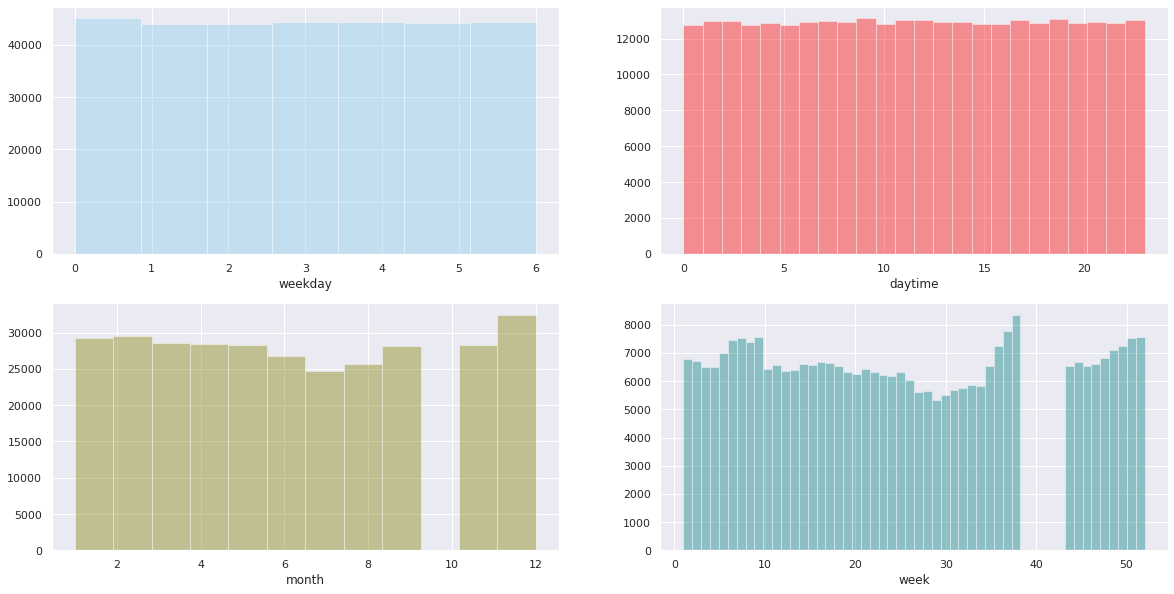

In [48]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions['weekday'], color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions['daytime'], color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions['month'], color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions['week'], color="teal", kde=False, bins=52, ax=axes[1, 1])

Tout d'abord, il existe de moments dans l'année où le volume de vents est plus important. En septembre, à la rentrée, et en novembre et décembre, pendant les fêtes de fin d'année. Nous remarquons, également, que le jour de la semaine et l'heure d'achat non pas d'influence sur le volume de vente. 


Nous allons investiger sur les pics de ventes, mais aussi sur l'influence des jours de la semaine et de l'heure. Egalement, le mois d'octobre est vide, puisque nous l'avons enlever les données qui étaient erronées.

Tout d'abord, nous allons prendre un échantillion de 1 %

In [49]:
df_transactions_sample = df_transactions.sample(3367)

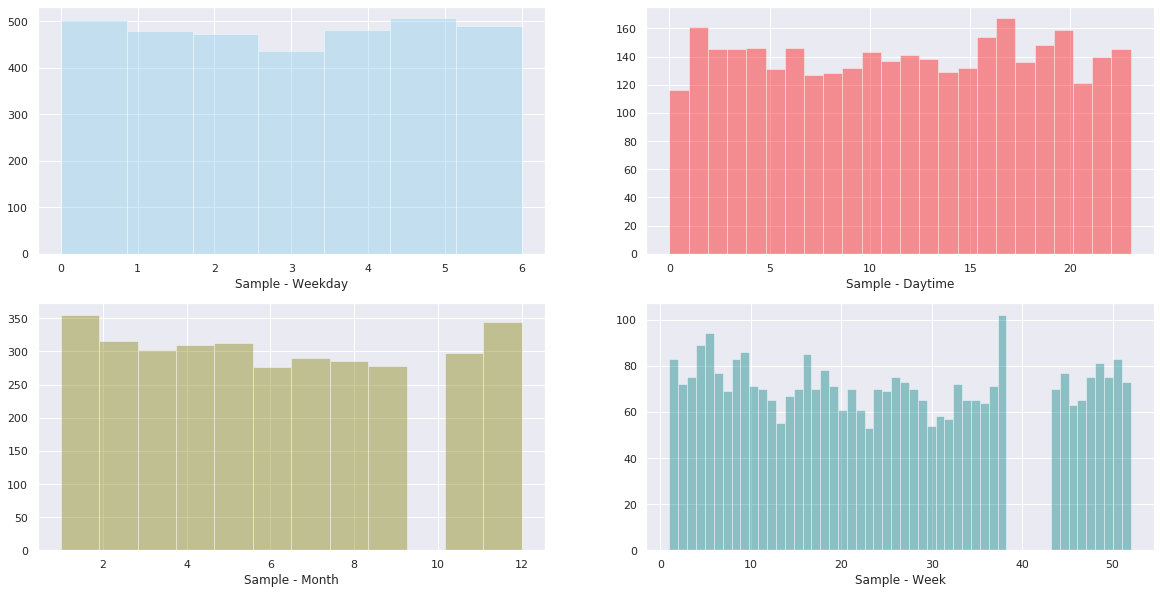

In [50]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions_sample['weekday'], axlabel='Sample - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions_sample['daytime'], axlabel='Sample - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions_sample['month'], axlabel='Sample - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions_sample['week'], axlabel='Sample - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

Nous remarquons qu'avec un échantillon de 1 %, la représentation des graphiques est similaire. Egalement, le mois d'octobre est vide, puisque nous l'avons enlever les données qui étaient erronées.

#### DataFrame sans le top 4 clients

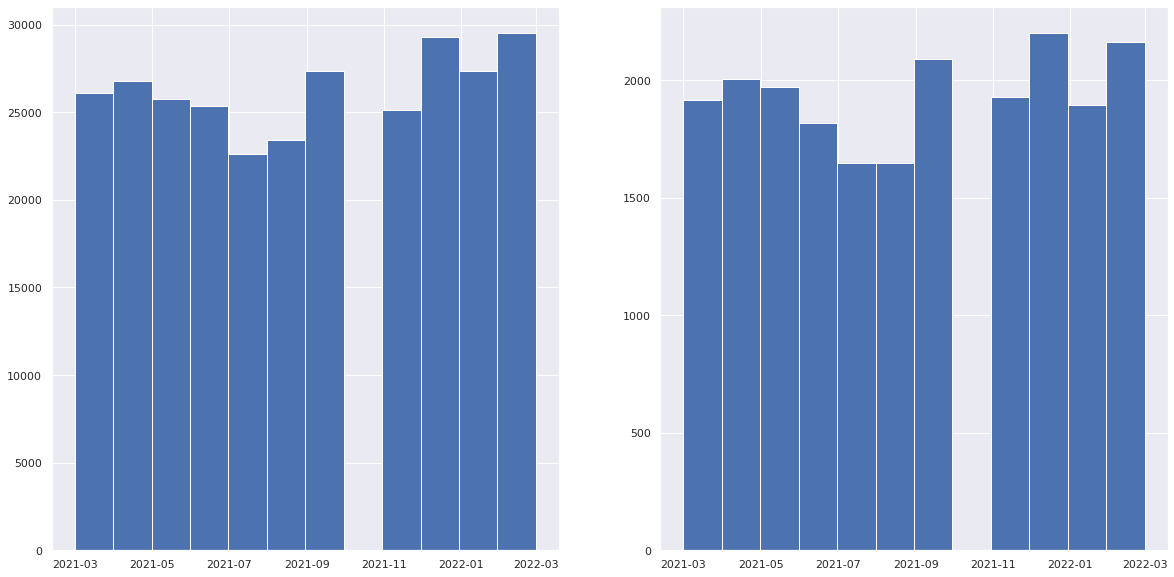

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
df_transactions[df_transactions['montant_total_rang'] > 4]['date'].hist(bins = 12, ax=axes[0])
df_transactions[df_transactions['montant_total_rang'] < 5]['date'].hist(bins = 12, ax=axes[1])

La répartition dans le temps entre les *average* clients et le top 4 est similaire

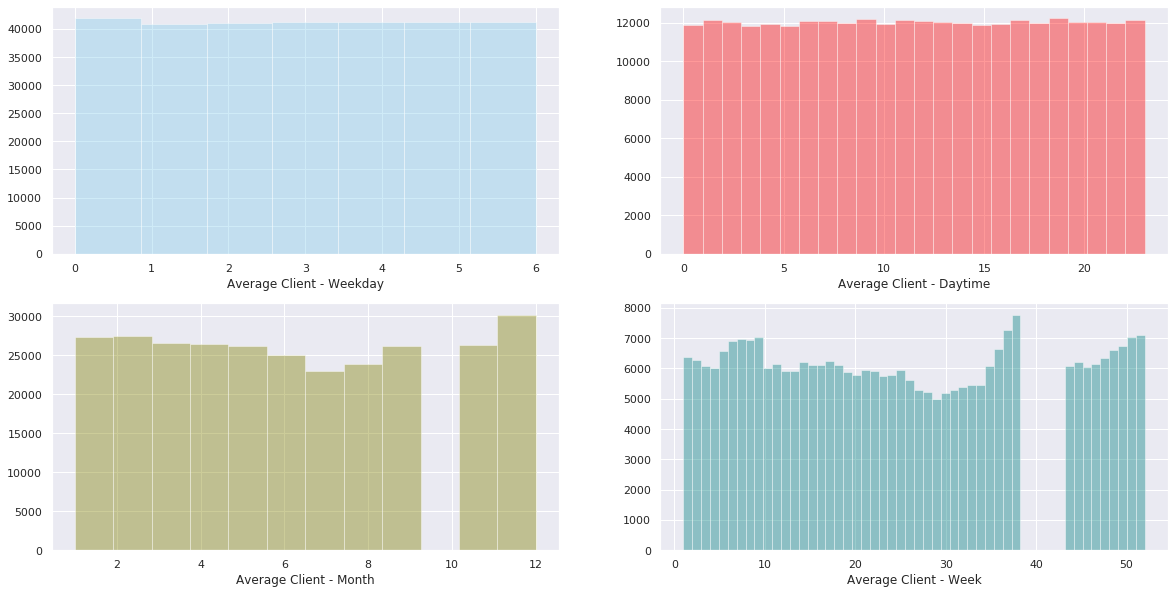

In [52]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['weekday'], axlabel='Average Client - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['daytime'], axlabel='Average Client - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['month'], axlabel='Average Client - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4]['week'], axlabel='Average Client - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

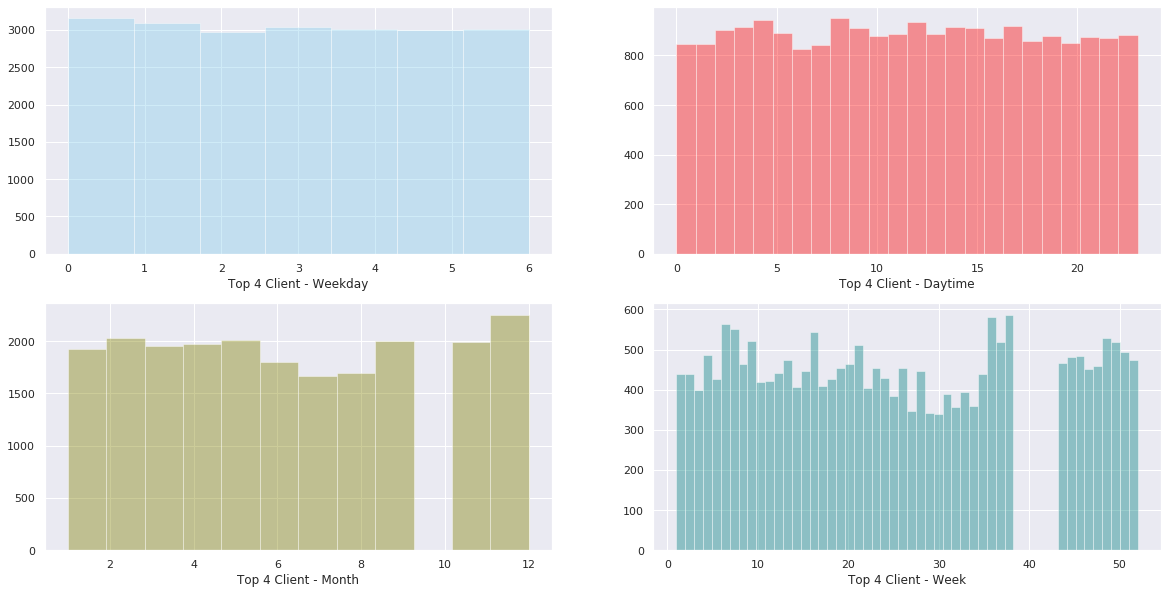

In [53]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['weekday'], axlabel='Top 4 Client - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['daytime'], axlabel='Top 4 Client - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['month'], axlabel='Top 4 Client - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5]['week'], axlabel='Top 4 Client - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

Nous constatons que le Top 4 Client n'a pas une influence significative sur la répartition des achats dans la semaine ou dans la journée. Egalement, le mois d'octobre est vide, puisque nous l'avons enlever les données qui étaient erronées.

### D. Colonne *session_amount*, *session_nb_produit*  et *session_categ*

#### DataFrame avec tous les clients

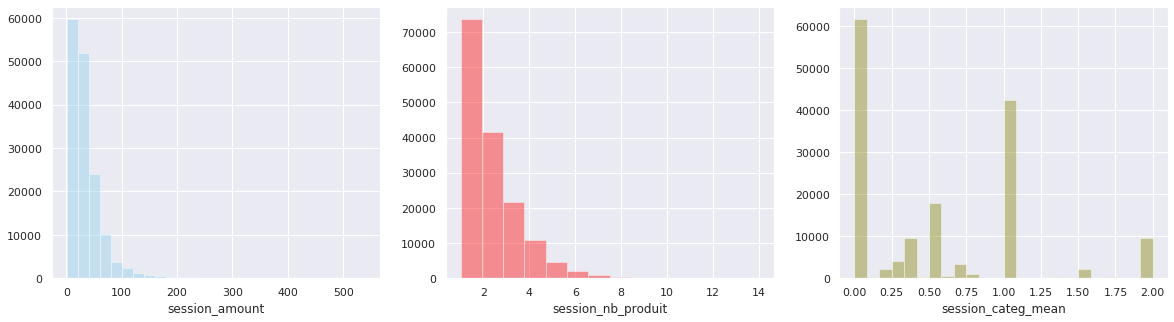

In [54]:
f, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(df_transactions.drop_duplicates('session_id')['session_amount'], color="skyblue", kde=False, bins=27, ax=axes[0])
sns.distplot(df_transactions.drop_duplicates('session_id')['session_nb_produit'], color="red", kde=False, bins=14, ax=axes[1])
sns.distplot(df_transactions.drop_duplicates('session_id')['session_categ_mean'], color="olive", kde=False, bins=24, ax=axes[2])

Les paniers sont d'un montant entre 0.69 et 40 euros.

#### DataFrame sans le top 4 clients

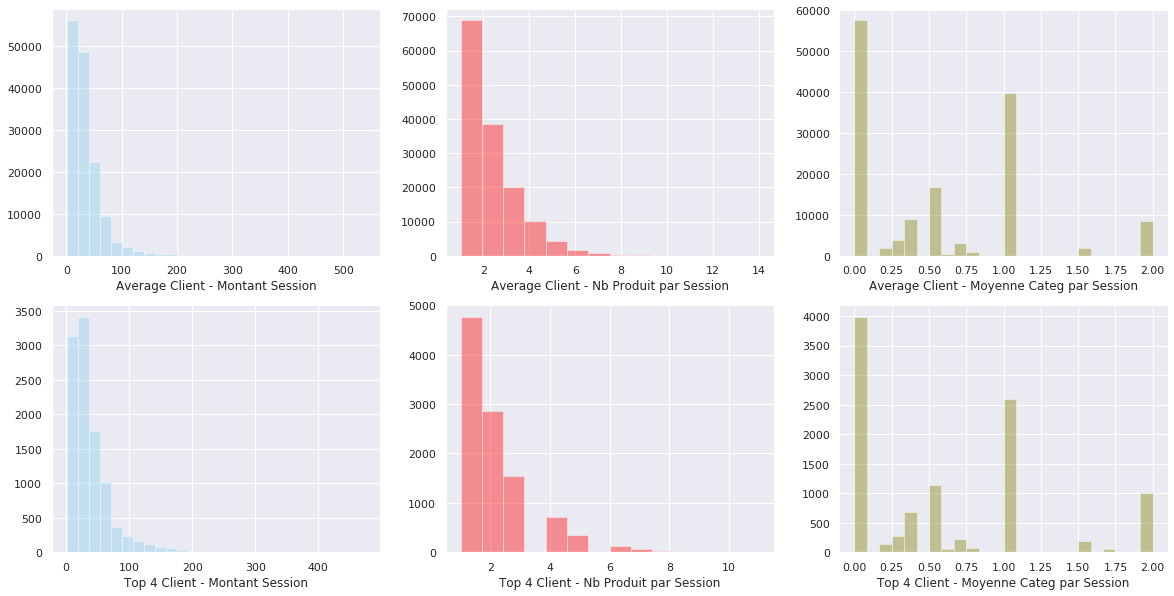

In [55]:
f, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('session_id')['session_amount'], axlabel='Average Client - Montant Session', color="skyblue", kde=False, bins=27, ax=axes[0, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('session_id')['session_nb_produit'], axlabel='Average Client - Nb Produit par Session', color="red", kde=False, bins=14, ax=axes[0, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] > 4].drop_duplicates('session_id')['session_categ_mean'], axlabel='Average Client - Moyenne Categ par Session', color="olive", kde=False, bins=24, ax=axes[0, 2])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5].drop_duplicates('session_id')['session_amount'], axlabel='Top 4 Client - Montant Session', color="skyblue", kde=False, bins=27, ax=axes[1, 0])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5].drop_duplicates('session_id')['session_nb_produit'], axlabel='Top 4 Client - Nb Produit par Session', color="red", kde=False, bins=14, ax=axes[1, 1])
sns.distplot(df_transactions[df_transactions['montant_total_rang'] < 5].drop_duplicates('session_id')['session_categ_mean'], axlabel='Top 4 Client - Moyenne Categ par Session', color="olive", kde=False, bins=24, ax=axes[1, 2])

### E. Conclusion

Nous avons 4 gros clients qui représentent plus de 7 % du montant des transactions et plus de 6 % du total des transactions, ils ont malgré tout, peu d'influence sur le profil des ventes. Néanmoins, nous approfondirons cela dans la 5e partie, pour essayer de determiner le profil de ces clients.


Les principaux clients sont dans la tranche 30 - 49 ans. Après cette age, nous avons des clients ponctuels effectuant un achat souvent unique, qui semblent peu familiers avec des achats sur internet. En dessous de 30 ans, nous avons peu de clients, alors qu'ils sont généralement lecteurs, et plus connectés à Internet. Ce point devra être developpé afin de determiner les causes.


Les livres les plus vendus sont dans une fourchette de 10 et 12 euros, la majorité des ventes de livres étant entre 6 et 18 euros. Nous allons analyser ces données pour conaaître les produits les plus vendus, ainsi que la répartition par *categ*


Finalement, nous avons constaté que l'heure et le jour d'achat n'avaient pas d'influence sur le volume des ventes. Par contre, il existe deux périodes, Septembre / Octobre et Novembre / Décembre, où les ventes s'écartent de la moyenne annuelle. Nous allons, également, tâcher de comprendre les raisons de ces écarts.

## 5. Analyses des données

### A. Produits les plus vendus

#### Les livres les plus vendus en terme de prix et de volume

In [56]:
df_transactions[['id_prod', 'price', 'categ', 'book_total_price', 'book_rank_price', 'book_total_sold', 'book_rank_sold']].drop_duplicates('id_prod').nsmallest(10, 'book_rank_price')

,id_prod,price,categ,book_total_price,book_rank_price,book_total_sold,book_rank_sold
208941,2_135,68.99,2,31873.38,1.0,462,141.5
258071,2_112,67.57,2,29122.67,2.0,431,172.0
85602,2_102,59.14,2,26967.84,3.0,456,149.0
175620,2_209,69.99,2,25616.34,4.0,366,240.0
5983,1_369,23.99,1,25429.40,5.0,1060,1.0
22646,1_395,28.99,1,25047.36,6.0,864,14.0
295684,2_110,62.25,2,24962.25,7.0,401,198.5
149245,1_383,28.99,1,24206.65,8.0,835,20.0
299693,2_166,230.04,2,23924.16,9.0,104,840.5
57470,1_414,23.83,1,23782.34,10.0,998,4.0


In [57]:
df_transactions[['id_prod', 'price', 'categ', 'book_total_price', 'book_rank_price', 'book_total_sold', 'book_rank_sold']].drop_duplicates('id_prod').nsmallest(10, 'book_rank_sold')

,id_prod,price,categ,book_total_price,book_rank_price,book_total_sold,book_rank_sold
5983,1_369,23.99,1,25429.40,5.0,1060,1.0
64877,1_417,20.99,1,21619.70,20.0,1030,2.0
96293,1_498,23.37,1,23673.81,11.0,1013,3.0
57470,1_414,23.83,1,23782.34,10.0,998,4.0
132687,1_425,16.99,1,16769.13,33.0,987,5.0
105416,1_406,24.81,1,23023.68,14.0,928,6.0
69033,1_398,10.17,1,9386.91,126.0,923,7.0
45674,1_413,17.99,1,16532.81,36.0,919,8.0
33372,1_403,17.99,1,16514.82,37.0,918,9.0
1882,1_407,15.99,1,14598.87,51.0,913,10.0


#### Les livres les plus vendus en terme de volume

In [58]:
df_transactions[['id_prod', 'price', 'categ', 'cat_age', 'book_total_price', 'book_rank_price', 'book_total_sold', 'book_rank_sold']].drop_duplicates('id_prod').nsmallest(100, 'book_rank_sold')['categ'].value_counts()

1    67
0    33
Name: categ, dtype: int64

Pour cette partie, nous allons prendre l'ancien Data Frame pour mettre en évidence le volume de vente nulle de *categ* 1 en Octobre.

In [59]:
df_transactions_old[['id_prod','price']].groupby('id_prod').count().nlargest(10, 'price')

NameError: name 'df_transactions_old' is not defined

In [ ]:
bestProduct = df_transactions_old.groupby('id_prod').count().nlargest(10, 'price').index
df_transactions_best_product = df_transactions_old[df_transactions_old['id_prod'].isin(bestProduct)]
df_transactions_best_product[['id_prod', 'price', 'categ']].drop_duplicates('id_prod')

Les 10 produits les plus vendus font tous partie de la *categ* 1, avec un prix variant de 10.17 à 24.81. Le premier livre d'une autre *categ* est en 43ème position.

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df_transactions_best_product['weekday'], axlabel='Best Product - Weekday', color="skyblue", kde=False, bins=7, ax=axes[0, 0])
sns.distplot(df_transactions_best_product['daytime'], axlabel='Best Product - Daytime', color="red", kde=False, bins=24, ax=axes[0, 1])
sns.distplot(df_transactions_best_product['month'], axlabel='Best Product - Month', color="olive", kde=False, bins=12, ax=axes[1, 0])
sns.distplot(df_transactions_best_product['week'], axlabel='Best Product - Week', color="teal", kde=False, bins=52, ax=axes[1, 1])

Nous remarquons, dans le dernier graphique, qu'il n'y a pas eu de ventes pendant 3 semaines en Octobre. Est-ce simplement les meilleurs produits, ou cela s'étends sur d'autres produits ?

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
for i in range(9):
    j = i + 1
    df = df_transactions_old[df_transactions_old['id_prod'].isin(df_transactions_old.groupby('id_prod').count().nlargest(j * 10, 'price').index)]
    sns.distplot(df['week'], axlabel=f'Best Product 0 to {j * 10} - Week', color="skyblue", kde=False, bins=52, ax=axes[i//3, i%3])

Nous voyons que progrssivement, à partir du 40e produit, nous avons de nouveau des ventes en prendant ces trois semaines en Octobre. Nous allons regarder cette période.

In [ ]:
df_transactions_old[df_transactions_old['week'].between(40, 42)].drop_duplicates('id_prod').describe()

Nous allons calculer le pourcentage de produits vendu par rapport à la moyenne habituelle.

In [ ]:
sell_product = []
for i in range (1, 52):
    sell_product.append(df_transactions_old[df_transactions_old['week'].between(i, i+2)].drop_duplicates('id_prod').shape[0] / products.count()['id_prod'] * 100)
    
moy_product = np.mean(sell_product)

In [ ]:
f"Nous avons vendu seulement {(df_transactions_old[df_transactions_old['week'].between(40, 42)].drop_duplicates('id_prod').shape[0]) / products.count()['id_prod'] * 100:0.2f} % de l'ensemble des produits présents sur le site au lieu de {moy_product:0.2f} %"

In [ ]:
df = df_transactions_old[df_transactions_old['week'].between(40, 42)].drop_duplicates('id_prod')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(df['price'], axlabel='Prix des produits vendus entre la semaine 40 et 42', color="skyblue", kde=False, bins=25, ax=axes[0, 0])
sns.distplot(df['categ'], axlabel='Categ des produits vendus entre la semaine 40 et 42', color="red", kde=False, bins=50, ax=axes[0, 1])
sns.distplot(df['weekday'], axlabel='Jour des produits vendus entre la semaine 40 et 42', color="olive", kde=False, bins=7, ax=axes[1, 0])
sns.distplot(df['daytime'], axlabel='Heure des produits vendus entre la semaine 40 et 42', color="teal", kde=False, bins=24, ax=axes[1, 1])

Nous remarquons qu'aucun livre de *categ* 1 n'a été vendu durant cette période. Est-ce une erreur ? Nous allons comparer le pourcentage de vente de *categ* 1 sur l'année et le comparer à la différence sur cette période.

In [ ]:
sell_product = []
sell_product_categ_0 = []
sell_product_categ_1 = []
sell_product_categ_2 = []

for i in range (1, 53):
    sell_product.append(df_transactions_old[(df_transactions_old['week'] == i)].drop_duplicates('id_prod').shape[0] / products.count()['id_prod'] * 100)
    sell_product_categ_0.append(df_transactions_old[(df_transactions_old['week'] == i) & (df_transactions_old['categ'] == 0)].shape[0] / df_transactions_old[df_transactions_old['week'] == i].count()['id_prod'] * 100)
    sell_product_categ_1.append(df_transactions_old[(df_transactions_old['week'] == i) & (df_transactions_old['categ'] == 1)].shape[0] / df_transactions_old[df_transactions_old['week'] == i].count()['id_prod'] * 100)
    sell_product_categ_2.append(df_transactions_old[(df_transactions_old['week'] == i) & (df_transactions_old['categ'] == 2)].shape[0] / df_transactions_old[df_transactions_old['week'] == i].count()['id_prod'] * 100)
    
moy_product = np.mean(sell_product_categ_1)

In [ ]:
x = pd.Series(range(1,53))

fig, axes = plt.subplots(3, 1, figsize=(20, 15))
sns.barplot(x=x, y=pd.Series(sell_product_categ_0), color="skyblue", ax=axes[0])
sns.barplot(x=x, y=pd.Series(sell_product_categ_1), color="skyblue", ax=axes[1])
sns.barplot(x=x, y=pd.Series(sell_product_categ_2), color="skyblue", ax=axes[2])

Nous constatons bien le fait qu'il n'y ai pas eu de vente durant les semaines 40 à 42, et un volume plus faible durant les semaines 39 et 43. Ainsi, pour garder un data Frame homogène, nous avons enlever ses 5 semaines.

Nous allons reprendre notre Data Frame corrigé pour reprendre l'analyse des données

#### Analyse par rapport l'age des acheteurs

##### Pour tous les livres

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions, hue= 'sex', ax=axes[0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions, hue= 'sex', ax=axes[1])

Nous constatons que, pour le volume d'age, les quantité sont sensiblement les même pour chaque catégorie d'age. Par contre, nous voyons que la catégorie d'age des moins de 30 ans ont une dispersion et une médiane plus grande que les autres catégories pour le montant dépensé.

##### Pour le top 100

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[1])

Nous voyons que la catégorie d'age intermédiaire a une dispersion et une médiane plus petite que les autres catégorie pour le montant dépensé et le volume acheté pour les livres les plus achetés

##### Pour les livres autres que le Top 100

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[1])

Nous voyons que la catégorie d'age des moins de 30 ans a une dispersion et une médiane plus grande que les autres catégorie pour le montant dépensé pour les autres livres que ceux du Top 100.

##### Avec et sans les Top 4 Clients pour tous les livres

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['montant_total_rang'] > 4], hue='sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['montant_total_rang'] > 4], hue='sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='book_total_sold',data=df_transactions[df_transactions['montant_total_rang'] < 5], hue='sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='book_total_price',data=df_transactions[df_transactions['montant_total_rang'] < 5], hue='sex', ax=axes[1, 1])

Nous retrouvons la même représentations des acheteurs avec ou sans le Top 4 clients. De plus, ces clients se comportent de la même façon que leur categorie d'age.

##### Avec et sans les Top 4 Clients pour le Top 100

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] < 101)], hue= 'sex', ax=axes[1, 1])

Nous retrouvons la même représentations des acheteurs avec ou sans le Top 4 clients.


##### Avec et sans les Top 4 Clients pour les livres autres que le Top 100

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] > 4) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='book_total_sold', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='book_total_price', data=df_transactions[(df_transactions['montant_total_rang'] < 5) & (df_transactions['book_rank_sold'] > 100)], hue= 'sex', ax=axes[1, 1])

Pour conclure, nous pouvons dire que la catégorie d'age n'a que peu d'influence sur le volume des ventes, mais que la catégorie d'age des moins de 30 ans avait une médiane de montant d'achat plus élevée que les autres catégories.

#### Analyse par rapport la catégorie des articles

##### Pour tous les livres

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='categ', y='book_total_sold',data=df_transactions, hue='sex', ax=axes[0])
sns.boxplot(x='categ', y='book_total_price',data=df_transactions, hue='sex', ax=axes[1])

Nouc constatons que la dispersion est plus grande et la médiane plus élevée pour les livres de la *categ* 1 pour les volumes vendus. Sans surprise, pour les montants ce sont les livres de la *categ* 2 qui ont la plus grande dispersion.

##### Pour le top 100

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='categ', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[0])
sns.boxplot(x='categ', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[1])

Nous remarquons que la dispersion chez les hommes achetant la *categ* 1 du Top 100 des livres est plus grande pour les 50 % des montant des achats.

##### Pour les livres autres que le Top 100

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='categ', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[0])
sns.boxplot(x='categ', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[1])

Nous constatons que, pour les livres n'appartenant pas au Top 100, les comportements d'achat en volume sont les mêmes quel que soit la *categ*

#### Analyse par rapport aux achats

##### Pour tous les livres

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_nb_achat', y='book_total_sold',data=df_transactions, hue='sex', ax=axes[0])
sns.boxplot(x='cat_nb_achat', y='book_total_price',data=df_transactions, hue='sex', ax=axes[1])

Les comportement d'achat sont les mêmes quel que soit le nombre de sessions des clients. Il semble que la médiane des clients ayant le moins de session est plus élevée que les autres catégories.

##### Pour le top 100

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_nb_achat', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[0])
sns.boxplot(x='cat_nb_achat', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] < 101], hue='sex', ax=axes[1])

Les comportement d'achat sont les mêmes quel que soit le nombre de sessions des clients pour le top 100 des livres

##### Pour les livres autres que le Top 100

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x='cat_nb_achat', y='book_total_sold',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[0])
sns.boxplot(x='cat_nb_achat', y='book_total_price',data=df_transactions[df_transactions['book_rank_sold'] > 100], hue='sex', ax=axes[1])

Les comportement d'achat sont les mêmes quel que soit le nombre de sessions des clients pour les livres autre que le top 100.

### B. Les meilleurs clients

#### Analyse par rapport l'age des acheteurs

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='cat_age', y='montant_total',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='cat_age', y='session_amount',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='cat_age', y='nombre_livre_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='cat_age', y='nombre_achat_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 1])

Nous constatons que la catégorie d'age intermédiaire, sans le Top 4 client, a une médiane la plus élevée pour les achats totaux, le nombre de livre acheté et le nombre de livre par client, alors que les moins de 30 ans ont une médiane pour le montant de panier plus élevée.

In [ ]:
sns.relplot(x="age", y="session_amount", size="montant_total",
            sizes=(40, 400), alpha=1, hue='categ', palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))
sns.relplot(x="age", y="nombre_livre_client", size="session_nb_produit",
            sizes=(40, 400), alpha=1, hue='categ', palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))
sns.relplot(x="age", y="freq_achat_mean", size="session_nb_produit_mean",
            sizes=(40, 400), alpha=1, hue='categ', palette="muted",
            height=6, data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(x='categ', y='montant_total',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 0])
sns.boxplot(x='categ', y='session_amount',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[0, 1])
sns.boxplot(x='categ', y='nombre_livre_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 0])
sns.boxplot(x='categ', y='nombre_achat_client',data=df_transactions[(df_transactions['montant_total_rang'] > 4)], hue= 'sex', ax=axes[1, 1])

In [ ]:
sns.jointplot(x='age', y='nombre_livre_client', kind="hex", data = df_transactions[(df_transactions['montant_total_rang'] > 4)])

In [ ]:
sns.jointplot(x="age", y="nombre_livre_client", data=df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200), kind="kde");

In [ ]:
corrmat = np.abs(df_transactions[(df_transactions['montant_total_rang'] > 4)].corr())
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=0.7, square=True)

In [ ]:
sns.relplot(x="session_amount", y="freq_achat_mean", hue = "categ", data = df_transactions[(df_transactions['montant_total_rang'] > 4)].sample(200))

In [ ]:
df_transactions.columns

In [ ]:
counter = (df_transactions.groupby(['categ', 'week'])['id_prod'].count())
counter_0 = counter.xs(0)
counter_1 = counter.xs(1)
counter_2 = counter.xs(2)

fig, axes = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x=counter_0.index, y=counter_0.values)
sns.lineplot(x=counter_1.index, y=counter_1.values)
sns.lineplot(x=counter_2.index, y=counter_2.values)


In [ ]:
counter_0

In [ ]:
df_transactions

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x=df_transactions_best_product['cat_price'], y=df_transactions_best_product['price'],data=df_transactions_best_product, ax=axes[0])
sns.boxplot(x=df_transactions_best_product['categ'], y=df_transactions_best_product['price'],data=df_transactions_best_product, ax=axes[1])

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(20, 70))
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['age'],data=df_transactions, ax=axes[0, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['age'],data=df_transactions, ax=axes[0, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['price'],data=df_transactions, ax=axes[1, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['price'],data=df_transactions, ax=axes[1, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['session_amount'],data=df_transactions, ax=axes[2, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['session_amount'],data=df_transactions, ax=axes[2, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['session_nb_produit'],data=df_transactions, ax=axes[3, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['session_nb_produit'],data=df_transactions, ax=axes[3, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['session_categ'],data=df_transactions, ax=axes[4, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['session_categ'],data=df_transactions, ax=axes[4, 1])
sns.boxplot(x=df_transactions['cat_price'], y=df_transactions['categ'],data=df_transactions, ax=axes[5, 0])
sns.boxplot(x=df_transactions['cat_age'], y=df_transactions['categ'],data=df_transactions, ax=axes[5, 1])
sns.boxplot(x=df_transactions['sex'], y=df_transactions['price'],data=df_transactions, ax=axes[6, 0])
sns.boxplot(x=df_transactions['sex'], y=df_transactions['age'],data=df_transactions, ax=axes[6, 1])

In [ ]:
df_transactions

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(df_transactions_best_product['cat_age'], axlabel='Cat_age from average clients - Transaction', kde=False, bins=8, ax=axes[0])
sns.distplot(df_transactions_best_product.drop_duplicates('session_id')['cat_age'], axlabel='Cat_age from average clients - Transaction Unique', kde=False, bins=8, ax=axes[1])

In [ ]:
df_transactions.drop_duplicates('session_id').groupby('cat_age').mean()['nombre_achat_client']

In [ ]:
df_transactions[df_transactions['client_id'] == 'c_1609']

In [ ]:
df_transactions_best_product[df_transactions_best_product['client_id'] == 'c_1609']